# Project 5 : cleaning and exploration

You will need the package **plotly** (https://pypi.org/project/plotly/) to run this notebook.

In [150]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os
from fonctions_eda import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import copy
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected"
%matplotlib inline

This project was made with Python 3.8.8, **Matplotlib 3.4.2**, Pandas 1.2.4, Numpy 1.20.1, Seaborn 0.11.1. Chek your version number:

In [151]:
print("Python", sys.version_info.major, ".", sys.version_info.minor)
print("Matplotlib", mpl.__version__)
print("Pandas", pd.__version__)
print("Nympy", np.__version__)
print("Seaborn", sns.__version__)

Python 3 . 8
Matplotlib 3.4.2
Pandas 1.2.4
Nympy 1.20.1
Seaborn 0.11.1


In [152]:
# For a better visualisation:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.rcParams.update({"figure.titlesize":16, "axes.titlesize":15, "axes.labelsize":14, "xtick.labelsize":14, 
    "ytick.labelsize":14})

## Load datasets

Add the path to the file containing the .csv files of the project:

In [153]:
path = "E:/Mes Docs/Sciences/Cours/OpenclassroomsDS-ML/Projet5"

**Do not forget to add the supplementary 'cities_brazil_IBGE.csv' and 'coordinates.csv' to the project file.**

In [154]:
path_customers = os.path.join(path, "olist_customers_dataset.csv")
path_geoloc = os.path.join(path, "olist_geolocation_dataset.csv")
path_order_items = os.path.join(path, "olist_order_items_dataset.csv")
path_order_payments = os.path.join(path, "olist_order_payments_dataset.csv")
path_order_reviews = os.path.join(path, "olist_order_reviews_dataset.csv")
path_order = os.path.join(path, "olist_orders_dataset.csv")
path_products = os.path.join(path, "olist_products_dataset.csv")
path_sellers = os.path.join(path, "olist_sellers_dataset.csv")
path_categories = os.path.join(path, "product_category_name_translation.csv")
path_cities = os.path.join(path, "cities_brazil_IBGE.csv")
path_coordinates = os.path.join(path, "coordinates.csv")

Loading data with pandas.

In [155]:
customers = pd.read_csv(path_customers, encoding="utf-8")
geoloc = pd.read_csv(path_geoloc, encoding="utf-8")
order_items = pd.read_csv(path_order_items, encoding="utf-8", parse_dates=[4])
order_payments = pd.read_csv(path_order_payments, encoding="utf-8")
order_reviews = pd.read_csv(path_order_reviews, encoding="utf-8", parse_dates=[5, 6])
orders = pd.read_csv(path_order, encoding="utf-8", parse_dates=[3, 4, 5, 6, 7])
products = pd.read_csv(path_products, encoding="utf-8")
sellers = pd.read_csv(path_sellers, encoding="utf-8")
categories = pd.read_csv(path_categories, encoding="utf-8")
cities = pd.read_csv(path_cities, encoding='utf-8', sep=';')
coordinates = pd.read_csv(path_coordinates, encoding='utf-8')

## Quick view and basic info on each files

In [156]:
customers.customer_city.unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [157]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [158]:
geoloc.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037           -23.55           -46.64   
1                         1046           -23.55           -46.64   
2                         1046           -23.55           -46.64   
3                         1041           -23.54           -46.64   
4                         1035           -23.54           -46.64   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [159]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26

In [160]:
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date  price  freight_value  
0 2017-09-19 09:45:35  58.90          13.29  
1 2017-05-03 11:05:13 239.90          19.93  
2 2018-01-18 14:48:30 199.00          17.87  
3 2018-08-15 10:10:18  12.99          12.79  
4 2017-02-13 13:57:51 199.90          18.14

In [161]:
order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [162]:
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN           2018-01-18   
1                                                NaN           2018-03-10   
2                                                NaN           2018-02-17   
3              Recebi bem antes do prazo estipulado.           2017-04-21   
4  Parabéns lojas lannister adorei comprar pela I...           2018-03-01   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [163]:
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                40.00                      287.00                1.00   
1                44.00                      276.00                1.00   
2                46.00                      250.00                1.00   
3                27.00                      261.00                1.00   
4                37.00                      402.00                4.00   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0            225.00              16.00              10.00             14.00  
1           1000.00              30.00              18.00             20.00  
2            154.00              18.00               9.00             15.00  
3            371.00              26.00               4.00             26.00  
4            625.00              20.00              17.00             13.00

In [164]:
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [165]:
categories.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [166]:
cities.head()

IBGECode            LocalCidade LocalUF LocalEstado RegiaoBrasil  Latitude  \
0   1100015  ALTA FLORESTA D'OESTE      RO    Rondonia            N  -119 283   
1   1100023              ARIQUEMES      RO    Rondonia            N  -990 571   
2   1100031                 CABIXI      RO    Rondonia            N  -134 945   
3   1100049                 CACOAL      RO    Rondonia            N  -114 343   
4   1100056             CEREJEIRAS      RO    Rondonia            N   -13 187   

  Longitude       Gentilico  PopEstimada_2018  PopCenso 2010  IDHM  \
0  -619 953  alta-florense              23167          24392  0.64   
1  -630 325    ariquemense             106168          90353  0.70   
2   -60 552     cabixiense               5438           6313  0.65   
3  -614 562     cacoalense              84813          78574  0.72   
4  -608 168   cerejeirense              16444          17029  0.69   

   ReceitasRealizadas_2014  DespesasEmpenhadas_2014  Pib_2014  
0                    53490                    47577  16461.11  
1                        0                        0  19401.43  
2                    22635                    19354  18346.17  
3                   169636                   155473  20725.23  
4                    53147                    46774  22179.17

In [167]:
datasets = [
    customers, geoloc, orders, order_items, order_payments, order_reviews, products, sellers, categories, cities
    ]
datasets_names = [
    "customers", "geoloc", "orders", "order_items", "order_payments", "order_reviews", "products", 
    "sellers", "categories", 'cities'
    ]
duplicate_subsets = [
    "customer_id", "geolocation_zip_code_prefix", "order_id", "product_id", "order_id", 
    "review_id", "product_id", "seller_id", "product_category_name", 'LocalCidade'
    ]
info_data_multi(datasets, datasets_names, duplicate_subsets)

nb lines  nb columns     size  nb duplicates  \
customers          99441           5   497205              0   
geoloc           1000163           5  5000815         981148   
orders             99441           8   795528              0   
order_items       112650           7   788550          79699   
order_payments    103886           5   519430           4446   
order_reviews     100000           7   700000            827   
products           32951           9   296559              0   
sellers             3095           4    12380              0   
categories            71           2      142              0   
cities              5570          14    77980            279   

                     subsets for duplicates  
customers                       customer_id  
geoloc          geolocation_zip_code_prefix  
orders                             order_id  
order_items                      product_id  
order_payments                     order_id  
order_reviews                     review_id  
products                         product_id  
sellers                           seller_id  
categories            product_category_name  
cities                          LocalCidade

The number of duplicates is easily explained since a customer can make several orders and an order may contain several items. Also, un single order can be paid with various methods (so there are also duplicates in the order_payments dataset).

In [168]:
order_reviews[order_reviews['review_id']=='308316408775d1600dad81bd3184556d']

review_id                          order_id  \
4574   308316408775d1600dad81bd3184556d  27e5ed2ecefbe0bcc9ae0c9b26b763c3   
5757   308316408775d1600dad81bd3184556d  3fe4dbcdb046a475dbf25463c1ca78bd   
54085  308316408775d1600dad81bd3184556d  8b3c2785144e72ccba9b0213f0f1cd1e   

       review_score review_comment_title  \
4574              5                  NaN   
5757              5                  NaN   
54085             5                  NaN   

                                  review_comment_message review_creation_date  \
4574   Ajudem a rastrear uma das 3 prateleiras que fa...           2017-09-07   
5757   Ajudem a rastrear uma das 3 prateleiras que fa...           2017-09-07   
54085  Ajudem a rastrear uma das 3 prateleiras que fa...           2017-09-07   

      review_answer_timestamp  
4574      2017-09-11 09:58:09  
5757      2017-09-11 09:58:09  
54085     2017-09-11 09:58:09

In [169]:
order_reviews[order_reviews.duplicated(subset='review_id')]

review_id                          order_id  \
3337   3242cc306a9218d0377831e175d62fbf  9c5bfba7de6a4abbb6ba0baab78d1622   
5757   308316408775d1600dad81bd3184556d  3fe4dbcdb046a475dbf25463c1ca78bd   
7266   8ee90ac383cf825bb7f4756130d4e74a  75d5d3d16567a27eefc5752aeb063072   
7859   d433c252647c51309432ca0b763f969b  191abde9c3bf77d1ce67d100d8db6d15   
9077   03a6a25db577d0689440933055111897  3fde8b7313af6b37b84b5c7594d7add0   
...                                 ...                               ...   
99883  2c6c08892b83ba4c1be33037c2842294  42ae1967f68c90bb325783ac55d761ce   
99899  6ec93e77f444e0b1703740a69122e35d  e1fdc6e9d1ca132377e862593a7c0bd4   
99939  2afe63a67dfd99b3038f568fb47ee761  c5334d330e36d2a810a7a13c72e135ee   
99942  017808d29fd1f942d97e50184dfb4c13  b1461c8882153b5fe68307c46a506e39   
99953  44d1e9165ec54b1d89d33594856af859  a7dbcf5043158d6fa72859eead2f3d10   

       review_score review_comment_title  \
3337              5                  NaN   
5757              5                  NaN   
7266              5                  NaN   
7859              1                  NaN   
9077              5                  NaN   
...             ...                  ...   
99883             4                  NaN   
99899             5                  NaN   
99939             5                  NaN   
99942             5                  NaN   
99953             4                  NaN   

                                  review_comment_message review_creation_date  \
3337                                              Ótimo            2017-07-21   
5757   Ajudem a rastrear uma das 3 prateleiras que fa...           2017-09-07   
7266                                           recomendo           2017-05-30   
7859                                                 NaN           2017-09-03   
9077   Muito Bom! Gostei Bastante! Tecido Ótimo! Aten...           2017-12-15   
...                                                  ...                  ...   
99883  Chegou um pouco amassada, mas nada de mais, e ...           2017-07-03   
99899              Vendedor compromisso do vou o cliente           2017-10-07   
99939  Muito bom, produto conforme anunciado, entrega...           2018-03-03   
99942                                                NaN           2018-03-02   
99953                                                NaN           2017-05-24   

      review_answer_timestamp  
3337      2017-07-22 01:06:37  
5757      2017-09-11 09:58:09  
7266      2017-06-02 18:16:17  
7859      2017-09-06 16:11:00  
9077      2017-12-16 01:32:18  
...                       ...  
99883     2017-07-05 19:06:59  
99899     2017-10-07 19:47:11  
99939     2018-03-04 22:56:47  
99942     2018-03-05 01:43:30  
99953     2017-05-24 23:15:21  

[827 rows x 7 columns]

However, some values in the geoloc dataset are real duplicates:

In [170]:
geoloc.rename(columns={"geolocation_zip_code_prefix":"customer_zip_code_prefix"},inplace=True)
print(f"Nb of unique prefix codes: {geoloc.customer_zip_code_prefix.unique().shape}")
print(f"Nb of lines : {geoloc.shape[0]}")

Nb of unique prefix codes: (19015,)
Nb of lines : 1000163


This is because latitude and longitude coordinates are sometimes slightly different for the same post code. We will clean this up and keep a single lat/lon coordinates for each post code.

In [171]:
geoloc[geoloc["customer_zip_code_prefix"]==99950]

customer_zip_code_prefix  geolocation_lat  geolocation_lng  \
999743                      99950           -28.07           -52.01   
999745                      99950           -28.07           -52.01   
999746                      99950           -28.07           -52.02   
999748                      99950           -28.07           -52.01   
999750                      99950           -28.07           -52.01   
999752                      99950           -28.06           -52.01   
999753                      99950           -28.07           -52.01   
999760                      99950           -28.06           -52.00   
999761                      99950           -28.07           -52.01   
999767                      99950           -28.07           -52.01   
999770                      99950           -28.06           -52.01   
999783                      99950           -28.07           -52.01   
999785                      99950           -28.07           -52.01   
999792                      99950           -28.06           -52.00   
999794                      99950           -28.07           -52.01   
999795                      99950           -28.07           -52.01   
999799                      99950           -28.07           -52.01   
999800                      99950           -28.06           -52.00   
999804                      99950           -28.07           -52.02   
999814                      99950           -28.07           -52.01   
999815                      99950           -28.06           -52.00   
999819                      99950           -28.07           -52.01   
999820                      99950           -28.06           -52.00   
999823                      99950           -28.07           -52.01   
999824                      99950           -28.07           -52.01   
999825                      99950           -28.06           -52.01   
999826                      99950           -28.07           -52.02   
999831                      99950           -28.07           -52.02   
999834                      99950           -28.07           -52.01   
999841                      99950           -28.07           -52.01   
999844                      99950           -28.07           -52.01   
999845                      99950           -28.07           -52.01   
999848                      99950           -28.07           -52.01   
999853                      99950           -28.07           -52.01   
999858                      99950           -28.07           -52.01   
999860                      99950           -28.07           -52.02   
999871                      99950           -28.07           -52.02   
999876                      99950           -28.07           -52.01   
999879                      99950           -28.07           -52.01   
999882                      99950           -28.07           -52.01   
999883                      99950           -28.07           -52.01   
999884                      99950           -28.07           -52.01   
999886                      99950           -28.07           -52.01   
999888                      99950           -28.07           -52.01   
999898                      99950           -28.07           -52.02   
999901                      99950           -28.08           -52.02   
999902                      99950           -28.07           -52.02   
999903                      99950           -28.07           -52.01   
999907                      99950           -28.07           -52.01   
999908                      99950           -28.07           -52.02   
999911                      99950           -28.06           -52.01   
999914                      99950           -28.07           -52.01   
999915                      99950           -28.07           -52.02   
999917                      99950           -28.07           -52.01   
999918                      99950           -28.07           -52.01   
999921                      99950

In [172]:
geoloc.drop_duplicates(subset="customer_zip_code_prefix", inplace=True)

We now have a much smaller dataset:

In [173]:
geoloc.customer_zip_code_prefix.unique().shape

(19015,)

For the cities dataset we have 279 duplicates. They correspond to different cities with the same name in different states.

In [174]:
cities[cities['LocalCidade']=='ESPERANTINA']

IBGECode  LocalCidade LocalUF LocalEstado RegiaoBrasil  Latitude  \
359   1707405  ESPERANTINA      TO   Tocantins            N  -536 593   
745   2203701  ESPERANTINA      PI       Piaui           NE  -388 863   

    Longitude        Gentilico  PopEstimada_2018  PopCenso 2010  IDHM  \
359  -485 378  esperantinense              10851           9476  0.57   
745  -422 324  esperantinense              39621          37767  0.60   

     ReceitasRealizadas_2014  DespesasEmpenhadas_2014  Pib_2014  
359                    18121                    17749   7074.53  
745                    58560                    49082   7442.04

### % of missing values

In [175]:
nan_col(customers)

% NaN  % dispo
customer_id                0.00   100.00
customer_unique_id         0.00   100.00
customer_zip_code_prefix   0.00   100.00
customer_city              0.00   100.00
customer_state             0.00   100.00

In [176]:
nan_col(geoloc)

% NaN  % dispo
customer_zip_code_prefix   0.00   100.00
geolocation_lat            0.00   100.00
geolocation_lng            0.00   100.00
geolocation_city           0.00   100.00
geolocation_state          0.00   100.00

In [177]:
nan_col(orders)

% NaN  % dispo
order_id                        0.00   100.00
customer_id                     0.00   100.00
order_status                    0.00   100.00
order_purchase_timestamp        0.00   100.00
order_approved_at               0.16    99.84
order_delivered_carrier_date    1.79    98.21
order_delivered_customer_date   2.98    97.02
order_estimated_delivery_date   0.00   100.00

In [178]:
nan_col(order_items)

% NaN  % dispo
order_id              0.00   100.00
order_item_id         0.00   100.00
product_id            0.00   100.00
seller_id             0.00   100.00
shipping_limit_date   0.00   100.00
price                 0.00   100.00
freight_value         0.00   100.00

In [179]:
nan_col(order_payments)

% NaN  % dispo
order_id               0.00   100.00
payment_sequential     0.00   100.00
payment_type           0.00   100.00
payment_installments   0.00   100.00
payment_value          0.00   100.00

In [180]:
nan_col(order_reviews)

% NaN  % dispo
review_id                 0.00   100.00
order_id                  0.00   100.00
review_score              0.00   100.00
review_comment_title     88.28    11.72
review_comment_message   58.25    41.75
review_creation_date      0.00   100.00
review_answer_timestamp   0.00   100.00

In [181]:
nan_col(products)

% NaN  % dispo
product_id                   0.00   100.00
product_category_name        1.85    98.15
product_name_lenght          1.85    98.15
product_description_lenght   1.85    98.15
product_photos_qty           1.85    98.15
product_weight_g             0.01    99.99
product_length_cm            0.01    99.99
product_height_cm            0.01    99.99
product_width_cm             0.01    99.99

In [182]:
print(f'There are {products[products["product_category_name"].isna()].shape[0]} products without category.')

There are 610 products without category.


In [183]:
nan_col(sellers)

% NaN  % dispo
seller_id                0.00   100.00
seller_zip_code_prefix   0.00   100.00
seller_city              0.00   100.00
seller_state             0.00   100.00

In [184]:
nan_col(categories)

% NaN  % dispo
product_category_name           0.00   100.00
product_category_name_english   0.00   100.00

In [185]:
nan_col(cities)

% NaN  % dispo
IBGECode                  0.00   100.00
LocalCidade               0.00   100.00
LocalUF                   0.00   100.00
LocalEstado               0.00   100.00
RegiaoBrasil              0.00   100.00
Latitude                  0.00   100.00
Longitude                 0.00   100.00
Gentilico                 0.00   100.00
PopEstimada_2018          0.00   100.00
PopCenso 2010             0.00   100.00
IDHM                      0.11    99.89
ReceitasRealizadas_2014   0.00   100.00
DespesasEmpenhadas_2014   0.00   100.00
Pib_2014                  0.00   100.00

Most files are very complete. There are only a few missing values for delivery dates, sizes/weight of products, and about 58% of orders without any reviews.

However, we need to correct a fewmistakes/missing info:
* 2 product categories are not in the portuguese/english translation file

In [186]:
# Replacing/adding categories:
products.replace('pc_gamer','pcs', inplace=True)
categories = categories.append(
    {'product_category_name':'portateis_cozinha_e_preparadores_de_alimentos', 
    'product_category_name_english':'food_processors'}, ignore_index=True
    )

Let's merge all datasets to make a complete one with all info for easier exploratory analysis.

In [187]:
data_full = pd.merge(
    categories, products, on="product_category_name", how="outer"
    )
data_full = pd.merge(
    data_full, order_items, on="product_id", how="outer"
    )
data_full = pd.merge(
    data_full, sellers, on="seller_id", how="outer"
    )
data_full = pd.merge(
    data_full, orders, on="order_id", how="outer"
    )

In [188]:
data_full[data_full['product_id'].isna()].shape

(775, 26)

There are 775 orders without details on ordered products. This correspond mainly to canceled, unavailable orders. Some are also labeled `'shipped'`, `'created'` or `'invoice'` (?).

In [189]:
data_full[data_full['product_id'].isna()]['order_status'].unique()

array(['unavailable', 'canceled', 'created', 'shipped', 'invoiced'],
      dtype=object)

In [190]:
data_full = pd.merge(
    products, order_items, on="product_id", how="outer"
    )
data_full = pd.merge(
    data_full, orders, on="order_id", how="outer"
    )
data_full = pd.merge(
    data_full, sellers, on="seller_id", how="outer"
    )
data_full = pd.merge(
    data_full, order_payments, on="order_id", how="outer"
    )
data_full = pd.merge(
    data_full, order_reviews, on="order_id", how="outer"
    )
data_full = pd.merge(
    data_full, customers, on="customer_id", how="outer"
    )
data_full = pd.merge(
    data_full, categories, on="product_category_name", how="outer"
    )
data_full = pd.merge(
    data_full, geoloc, on="customer_zip_code_prefix", how="inner"
    )

data_full

product_id              product_category_name  \
0       1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1       c85ef665dddff9ed38e6545814f24a0d  construcao_ferramentas_construcao   
2       3f14d740544f37ece8a9e7bc8349797e             informatica_acessorios   
3       d1c427060a0f73f6b889a5c7c61f2ac4             informatica_acessorios   
4       44d097d59e8430f88a67517cd0c4f865        fashion_bolsas_e_acessorios   
...                                  ...                                ...   
118824  cd48f265a63e13b762601f5f794c5fca                            bebidas   
118825  ad2037645597db38527fe3afbe226af2                            bebidas   
118826  ad2037645597db38527fe3afbe226af2                            bebidas   
118827  d99526b1e4fa5f57b8bde34a7337b5ee                            bebidas   
118828  94656ce34a307d26e23011bb25148c9e                             flores   

        product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.00                      287.00                1.00   
1                     53.00                      757.00                2.00   
2                     44.00                      655.00                1.00   
3                     59.00                     1893.00                1.00   
4                     55.00                      151.00                6.00   
...                     ...                         ...                 ...   
118824                48.00                      859.00                3.00   
118825                48.00                      886.00                2.00   
118826                48.00                      886.00                2.00   
118827                45.00                      887.00                1.00   
118828                60.00                      169.00                1.00   

        product_weight_g  product_length_cm  product_height_cm  \
0                 225.00              16.00              10.00   
1                1250.00              32.00              14.00   
2                 321.00              19.00              14.00   
3                6550.00              20.00              20.00   
4                 350.00              16.00               2.00   
...                  ...                ...                ...   
118824            175.00              23.00              21.00   
118825            850.00              22.00              17.00   
118826            850.00              22.00              17.00   
118827            250.00              18.00              18.00   
118828            400.00              16.00              16.00   

        product_width_cm                          order_id  order_item_id  \
0                  14.00  e17e4f88e31525f7deef66779844ddce           1.00   
1                  17.00  9b8ac5a3f09f1af11380aa4451dc2ac4           1.00   
2                  13.00  61e3bd0de079bba22ce8062d0ef4d393           1.00   
3                  20.00  a6f396e6584d25c2b097d0dcd625f10f           1.00   
4                  20.00  fb025feb5409d5d084e05d995c0e0e7c           1.00   
...                  ...                               ...            ...   
118824             21.00  acfd491b37f7671bf93d9abc2c1ba7af           1.00   
118825             17.00  0bf5f8d1827bd25b377ffbe375420463           1.00   
118826             17.00  0bf5f8d1827bd25b377ffbe375420463           1.00   
118827             18.00  a1119e009d1d91655405307f4c095818           1.00   
118828             16.00  3489314598632acec4c8a6aee1c781ce           1.00   

                               seller_id shipping_limit_date  price  \
0       5670f4db5b62c43d542e1b2d56b0cf7c 2018-04-30 17:33:54  10.91   
1       6824a69c9ea0313eba299dd4a2dba09a 2018-08-14 15:55:14 186.40   
2       f457c46070d02cadd8a68551231220dd 2018-01-17 17:16:26  84.90   
3       a1043bafd471dff536d0c462352beb48 2018-06-11 08:51:44 119.00   
4       6560211a19b47992c3666cc44a7e94c0 2018-06-20 15:02:0

In [191]:
print(f'Before droping NaN: {data_full.shape[0]} lines.')

Before droping NaN: 118829 lines.


Now we will delete rows with `NaN`:

In [192]:
# We drop all lines with NaN except for review comment message and title
subset_drop = list(data_full.columns)
subset_drop.remove('review_comment_title')
subset_drop.remove('review_comment_message')
data_full.dropna(subset=subset_drop, inplace=True)
print(f'After droping NaN: {data_full.shape[0]} lines.')

After droping NaN: 113775 lines.


## Basic structure and statistic info

In [193]:
print(f'There are {customers.customer_unique_id.unique().shape[0]} unique customers.')
print(f'They live in {customers.customer_city.unique().shape[0]} different cities in \
    {customers.customer_state.unique().shape[0]} different states.')
print('')
print(f'The dataset contains {orders.order_id.unique().shape[0]} orders made between \
    {orders.order_purchase_timestamp.min()} and {orders.order_purchase_timestamp.max()}.')
print(f'{order_items.product_id.unique().shape[0]} unique products were sold by \
    {order_items.seller_id.unique().shape[0]} unique sellers.')
print(f'Prices range between {order_items.price.min()} and {order_items.price.max()} B$.')
print(f'Customers made between {order_payments.payment_installments.min()} and \
    {order_payments.payment_installments.max()} installments.')
print(f'Payment types used: {order_payments.payment_type.unique()}')
print('')
print(f'There are {categories.product_category_name_english.unique().shape[0]} categories of products: \
    {categories.product_category_name_english.unique()}')


There are 96096 unique customers.
They live in 4119 different cities in     27 different states.

The dataset contains 99441 orders made between     2016-09-04 21:15:19 and 2018-10-17 17:30:18.
32951 unique products were sold by     3095 unique sellers.
Prices range between 0.85 and 6735.0 B$.
Customers made between 0 and     24 installments.
Payment types used: ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']

There are 72 categories of products:     ['health_beauty' 'computers_accessories' 'auto' 'bed_bath_table'
 'furniture_decor' 'sports_leisure' 'perfumery' 'housewares' 'telephony'
 'watches_gifts' 'food_drink' 'baby' 'stationery' 'tablets_printing_image'
 'toys' 'fixed_telephony' 'garden_tools' 'fashion_bags_accessories'
 'small_appliances' 'consoles_games' 'audio' 'fashion_shoes' 'cool_stuff'
 'luggage_accessories' 'air_conditioning'
 'construction_tools_construction'
 'kitchen_dining_laundry_garden_furniture' 'costruction_tools_garden'
 'fashion_male_clothing' 'pet

Structure and relationships between datasets:

In [194]:
print(f'{orders["order_id"].unique().shape[0]} unique order_id in orders dataset.')
print(f'{order_reviews["order_id"].unique().shape[0]} unique order_id in order_reviews dataset.')

99441 unique order_id in orders dataset.
99441 unique order_id in order_reviews dataset.


We are fine here.

In [195]:
print(f'{order_payments["order_id"].unique().shape[0]} unique order_id in order_payments dataset.')

99440 unique order_id in order_payments dataset.


1 order does not have details about payments.

In [196]:
print(f'{order_reviews["order_id"].unique().shape[0]} unique order_id in order_reviews dataset.')
print(f'{order_reviews["review_id"].unique().shape[0]} unique review_id in order_reviews dataset.')

99441 unique order_id in order_reviews dataset.
99173 unique review_id in order_reviews dataset.


There is a discrepancy between the number of orders and reviews. Example: 2 different reviews on the same order made at 2 different dates (the customer changed his mind about the product):

In [197]:
order_reviews[order_reviews['order_id']=='42ae1967f68c90bb325783ac55d761ce']

review_id                          order_id  \
8273   193d73d33b656807084215db91b23b8c  42ae1967f68c90bb325783ac55d761ce   
99883  2c6c08892b83ba4c1be33037c2842294  42ae1967f68c90bb325783ac55d761ce   

       review_score review_comment_title  \
8273              3                  NaN   
99883             4                  NaN   

                                  review_comment_message review_creation_date  \
8273                                                 NaN           2017-07-19   
99883  Chegou um pouco amassada, mas nada de mais, e ...           2017-07-03   

      review_answer_timestamp  
8273      2017-07-19 12:22:10  
99883     2017-07-05 19:06:59

Note that the 2 reviews concern the same product (order of a single product):

In [198]:
orders[orders['order_id']=='42ae1967f68c90bb325783ac55d761ce']

order_id                       customer_id  \
10220  42ae1967f68c90bb325783ac55d761ce  a7de5fdc43e51f84437e88b447da5fc2   

      order_status order_purchase_timestamp   order_approved_at  \
10220    delivered      2017-06-26 11:44:22 2017-06-26 11:55:25   

      order_delivered_carrier_date order_delivered_customer_date  \
10220          2017-06-27 14:43:28           2017-07-02 11:37:22   

      order_estimated_delivery_date  
10220                    2017-07-07

Also note that it is **not** possible to link a review to a specific product, only to an order (that may contain several different products).

In [199]:
print(f'{order_items["order_id"].unique().shape[0]} unique order_id in order_items dataset.')
print(f'{orders["order_id"].unique().shape[0]} unique order_id in orders dataset.')

98666 unique order_id in order_items dataset.
99441 unique order_id in orders dataset.


There are also 775 orders in `order_items` but not in `orders` dataset. They correspond mainly to cancelled or unavailable orders:

In [200]:
id_in_order_items = set(order_items['order_id'].unique())
id_in_orders = set(orders['order_id'].unique())
not_delivered = id_in_orders - id_in_order_items
orders[orders['order_id'].isin(not_delivered)]['order_status']

266      unavailable
586      unavailable
687      unavailable
737      unavailable
1130        canceled
            ...     
99252    unavailable
99283       canceled
99347       canceled
99348    unavailable
99415    unavailable
Name: order_status, Length: 775, dtype: object

In the `customers` dataset, there are more `customer_id` than `customer_unique_id`: one customer can make several orders and be linked to several `customer_id`. Each `customer_id` correspond to a single `order_id`.

In [201]:
print(f'{customers["customer_id"].unique().shape[0]} unique customer_id in customers dataset.')
print(f'{customers["customer_unique_id"].unique().shape[0]} unique customer_unique_id in customers dataset.')

99441 unique customer_id in customers dataset.
96096 unique customer_unique_id in customers dataset.


### Profile report

In [202]:
#profile = ProfileReport(data_full)
#profile.to_widgets()

In [203]:
data_full.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count            113775.00                   113775.00           113775.00   
mean                 48.80                      784.86                2.21   
std                  10.02                      650.72                1.72   
min                   5.00                        4.00                1.00   
25%                  42.00                      345.00                1.00   
50%                  52.00                      600.00                1.00   
75%                  57.00                      983.00                3.00   
max                  76.00                     3992.00               20.00   

       product_weight_g  product_length_cm  product_height_cm  \
count         113775.00          113775.00          113775.00   
mean            2109.40              30.29              16.61   
std             3769.70              16.16              13.44   
min                0.00               7.00               2.00   
25%              300.00              18.00               8.00   
50%              700.00              25.00              13.00   
75%             1800.00              38.00              20.00   
max            40425.00             105.00             105.00   

       product_width_cm  order_item_id     price  freight_value  \
count         113775.00      113775.00 113775.00      113775.00   
mean              23.11           1.20    120.00          20.00   
std               11.74           0.70    182.43          15.73   
min                6.00           1.00      0.85           0.00   
25%               15.00           1.00     39.90          13.08   
50%               20.00           1.00     74.90          16.32   
75%               30.00           1.00    132.98          21.19   
max              118.00          21.00   6735.00         409.68   

       seller_zip_code_prefix  payment_sequential  payment_installments  \
count               113775.00           113775.00             113775.00   
mean                 24523.00                1.09                  2.95   
std                  27646.66                0.69                  2.78   
min                   1001.00                1.00                  0.00   
25%                   6429.00                1.00                  1.00   
50%                  13690.00                1.00                  2.00   
75%                  28495.00                1.00                  4.00   
max                  99730.00               26.00                 24.00   

       payment_value  review_score  customer_zip_code_prefix  geolocation_lat  \
count      113775.00     113775.00                 113775.00        113775.00   
mean          172.14          4.07                  35005.13           -21.24   
std           266.25          1.36                  29836.17             5.57   
min             0.00          1.00                   1003.00           -36.61   
25%            60.95          4.00                  11250.00           -23.59   
50%           108.09          5.00                  24240.00           -22.93   
75%           189.34          5.00                  58342.50           -20.20   
max         13664.08          5.00                  99980.00            42.18   

       geolocation_lng  
count        113775.00  
mean            -46.20  
std               4.05  
min             -72.67  
25%             -48.11  
50%             -46.63  
75%             -43.63  
max              -8.58

### Distributions

#### Numerical variables

Let's have a better look at the distribution of numerical variables:

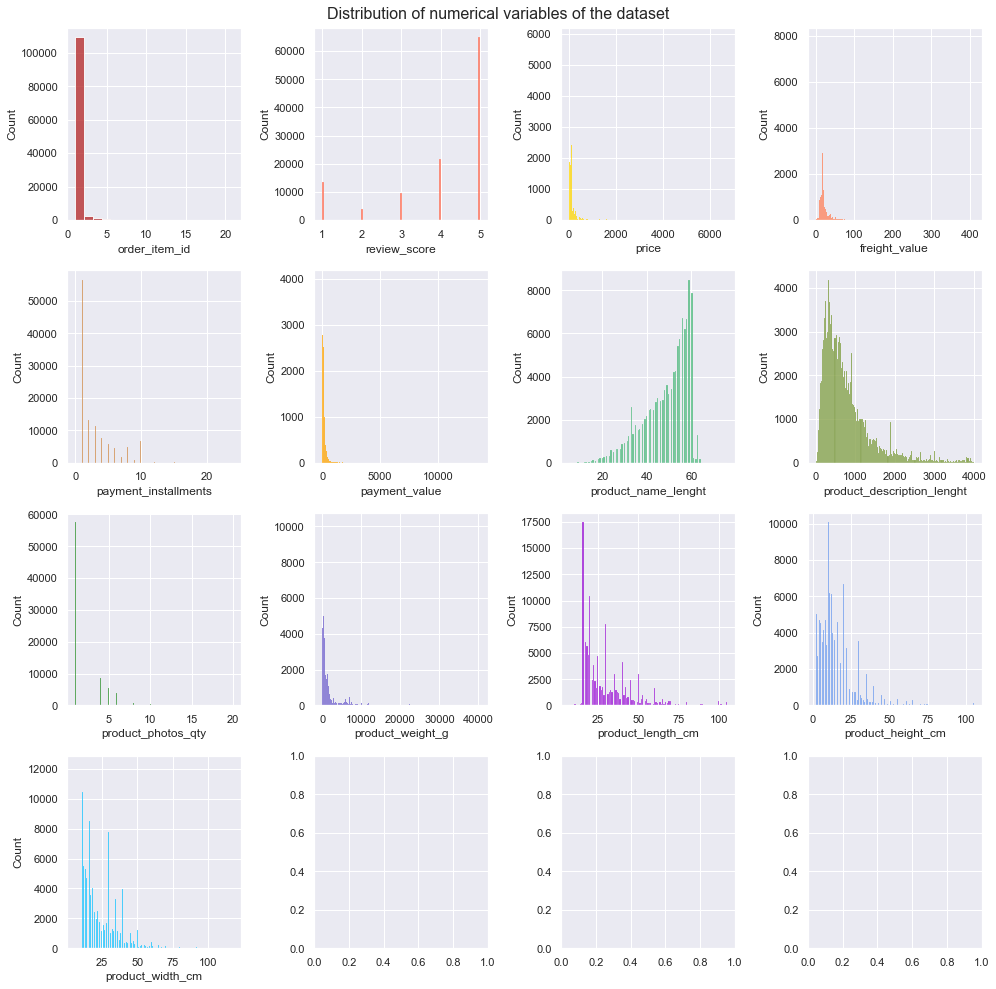

In [204]:
sns.set_theme(style='darkgrid')

fig, ax = plt.subplots(4, 4, figsize=(14,14), tight_layout=True)

fig.suptitle('Distribution of numerical variables of the dataset')

col = [
        'order_item_id', 'review_score', 'price', 'freight_value', 'payment_installments', 'payment_value',
        'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g',
        'product_length_cm', 'product_height_cm', 'product_width_cm'
        ]
colors = [
        'firebrick', 'tomato', 'gold', 'coral', 'peru', 'orange', 
        'mediumseagreen', 'olivedrab','forestgreen', 
        'slateblue', 'darkviolet', 'cornflowerblue', 'deepskyblue'
        ]
axes = [
        (0,0), (0,1), (0,2), (0,3),
        (1,0), (1,1), (1,2), (1,3),
        (2,0), (2,1), (2,2), (2,3),
        (3,0), (3,1), (3,2), (3,3)
        ]

for axe, co, colo in zip(axes, col, colors):
    sns.histplot(ax=ax[axe], data=data_full[co], color=colo)
    
#fig.savefig("var_distrib.png", bbox_inches="tight", dpi=150);

We observe that:
* almost all distributions are unimodals, with high to very high positive skewness, except for product name length (negative skewness) and review score (bi-modal in values 1 and 5).
* most orders are made for a small number of items (more than 75% of orders concern only 1 item)
* most review scores are good or very good (more than 50% of the scores are 5)
* prices span a large range and 50% of them are <= 60.85 B&#36; (same kind of distribution for freight value and payment value).
* 50% of  orders are paid with 1 or 2 installements
* 50% of products have a single photo

[]

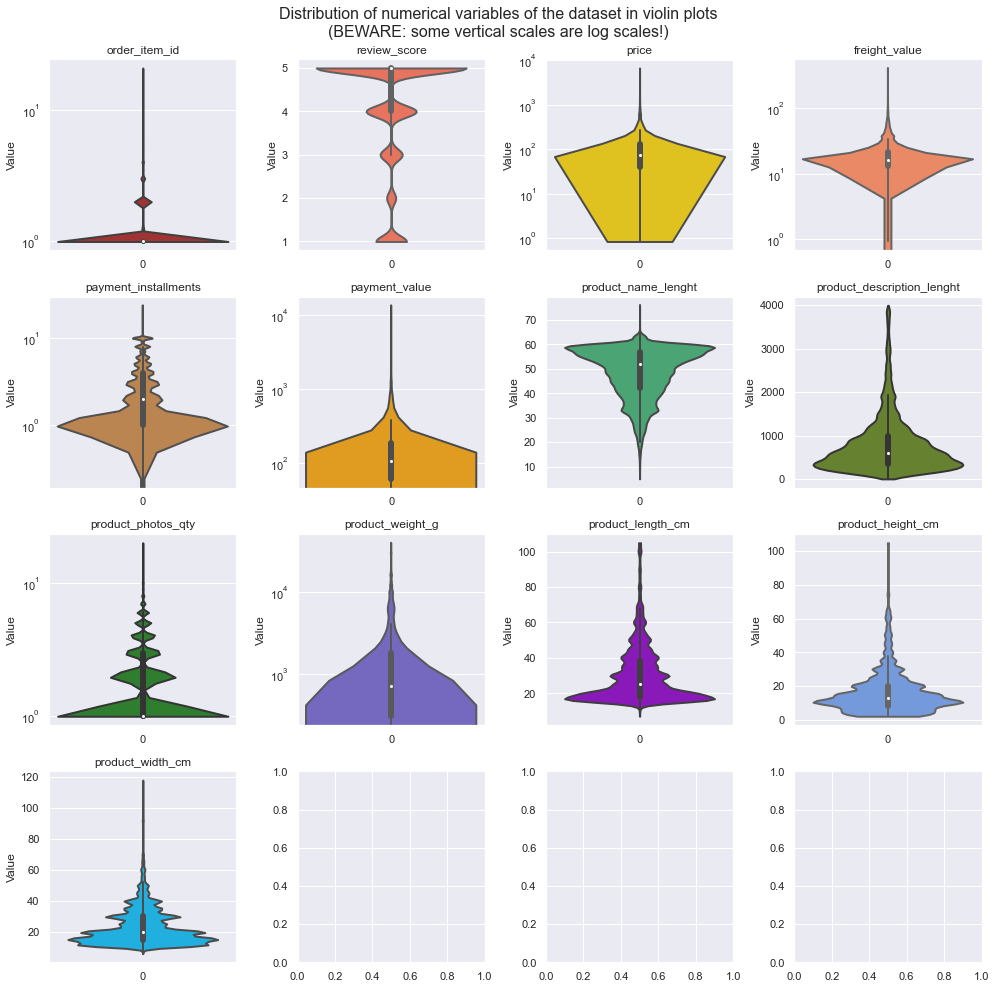

In [205]:
fig, ax = plt.subplots(4, 4, figsize=(14,14), tight_layout=True)

fig.suptitle('Distribution of numerical variables of the dataset in violin plots\n(BEWARE: some vertical scales are log scales!)')

col = [
        'order_item_id', 'review_score', 'price', 'freight_value', 'payment_installments', 'payment_value',
       'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'
       ]
colors = [
        'firebrick', 'tomato', 'gold', 'coral', 'peru', 'orange', 
        'mediumseagreen', 'olivedrab','forestgreen', 
        'slateblue', 'darkviolet', 'cornflowerblue', 'deepskyblue'
        ]
axes = [
        (0,0), (0,1), (0,2), (0,3),
        (1,0), (1,1), (1,2), (1,3),
        (2,0), (2,1), (2,2), (2,3),
        (3,0), (3,1), (3,2), (3,3)
        ]

for axe, co, colo in zip(axes, col, colors):
    sns.violinplot(ax=ax[axe], data=data_full[co], color=colo, cut=0, linewidth=2)
    ax[axe].set_title(co)
    ax[axe].set_ylabel('Value')
ax[0, 0].semilogy()
ax[0, 2].semilogy()
ax[0, 3].semilogy()
ax[1, 0].semilogy()
ax[1, 1].semilogy()
ax[2, 0].semilogy()
ax[2, 1].semilogy()

#fig.savefig("var_distrib_violin.png", bbox_inches="tight", dpi=150);

The violin plots show more comprehensively the distribution and density of numerical variables.

#### Categorical variables

Here we look at the 15 most common categories for the main categorical variables.

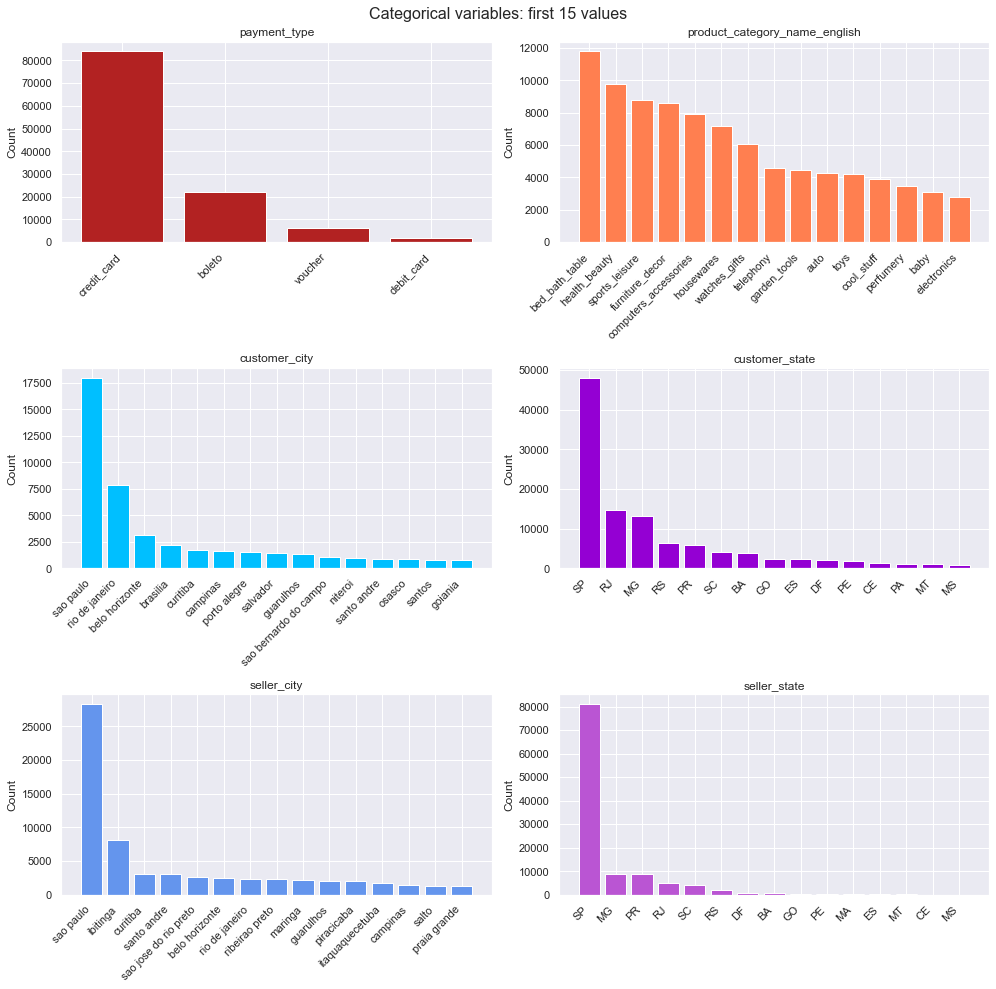

In [206]:
fig, ax = plt.subplots(3, 2, figsize=(14,14), tight_layout=True)

fig.suptitle('Categorical variables: first 15 values')

col = [
    'payment_type', 'product_category_name_english', 'customer_city', 'customer_state', 'seller_city', 'seller_state'
    ]
colors = [
    'firebrick', 'coral', 'deepskyblue', 'darkviolet', 'cornflowerblue', 'mediumorchid'
    ]
axes = [
    (0,0), (0,1), (1,0), (1,1), (2,0), (2,1)
    ]

for axe, co, colo in zip(axes, col, colors):
    ax[axe].bar(height=data_full[co].value_counts()[:15], x=data_full[co].value_counts().index[:15],  color=colo)
    ax[axe].set_title(co)
    ax[axe].set_ylabel('Count')
    ax[axe].set_xticks(data_full[co].value_counts().index[:15])
    ax[axe].set_xticklabels(data_full[co].value_counts().index[:15], rotation=45, ha='right')

#fig.savefig("var_cat.png", bbox_inches="tight", dpi=150);

* Most payments are made with credit card, secondly with tickets, then voucher and debit card.
* The most common type of items sold are related to interior design, then health/beauty and in third place sports and leisure.
* The first 2 location of customers are large cities: Sao Paulo and Rio de Janeiro.
* Sellers with the highest number of orders are located mainly in Sao Paulo and Bitinga.

### Best & worst customers and sellers, relationship with location

We will have a look at the relationships between customer city and prices of orders and review scores (does customer location have an influence on these variables?). We can also see which sellers have the best mean review score.

In [207]:
# We take the customer cities with 10 or more orders:
customer_city_count = data_full.groupby('customer_city').count()
customer_city_count_10 = customer_city_count[customer_city_count['order_id']>=10].index

# And sellers with 10 or more orders:
seller_id_count = data_full.groupby('seller_id').count()
seller_id_count_10 = seller_id_count[seller_id_count['review_score']>=10].index

# We calculate median price and mean review score grouped by customer city,
# mean review scores grouped by seller id as well as associated standard deviations, 
# and take first and last 10 cities/sellers:

city_price_median = data_full.groupby('customer_city').median()['price'].reindex(index=customer_city_count_10).iloc[np.r_[:10, -10:0]]
city_review_mean = data_full.groupby('customer_city').mean()['review_score'].reindex(index=customer_city_count_10).iloc[np.r_[:10, -10:0]]
seller_review_mean = data_full.groupby('seller_id').mean()['review_score'].reindex(index=seller_id_count_10).iloc[np.r_[:10, -10:0]]

city_price_std = data_full.groupby('customer_city').std()['price'].reindex(index=customer_city_count_10).iloc[np.r_[:10, -10:0]]
city_review_std = data_full.groupby('customer_city').std()['review_score'].reindex(index=customer_city_count_10).iloc[np.r_[:10, -10:0]]
seller_review_std = data_full.groupby('seller_id').std()['review_score'].reindex(index=seller_id_count_10).iloc[np.r_[:10, -10:0]]

# Sort values:
city_price_median.sort_values(ascending=False, inplace=True)
city_review_mean.sort_values(ascending=False, inplace=True)
seller_review_mean.sort_values(ascending=False, inplace=True)

# Re-order indexes of standard deviations:
city_price_std = city_price_std.reindex(index=city_price_median.index)
city_review_std = city_review_std.reindex(index=city_review_mean.index)
seller_review_std = seller_review_std.reindex(index=seller_review_mean.index)

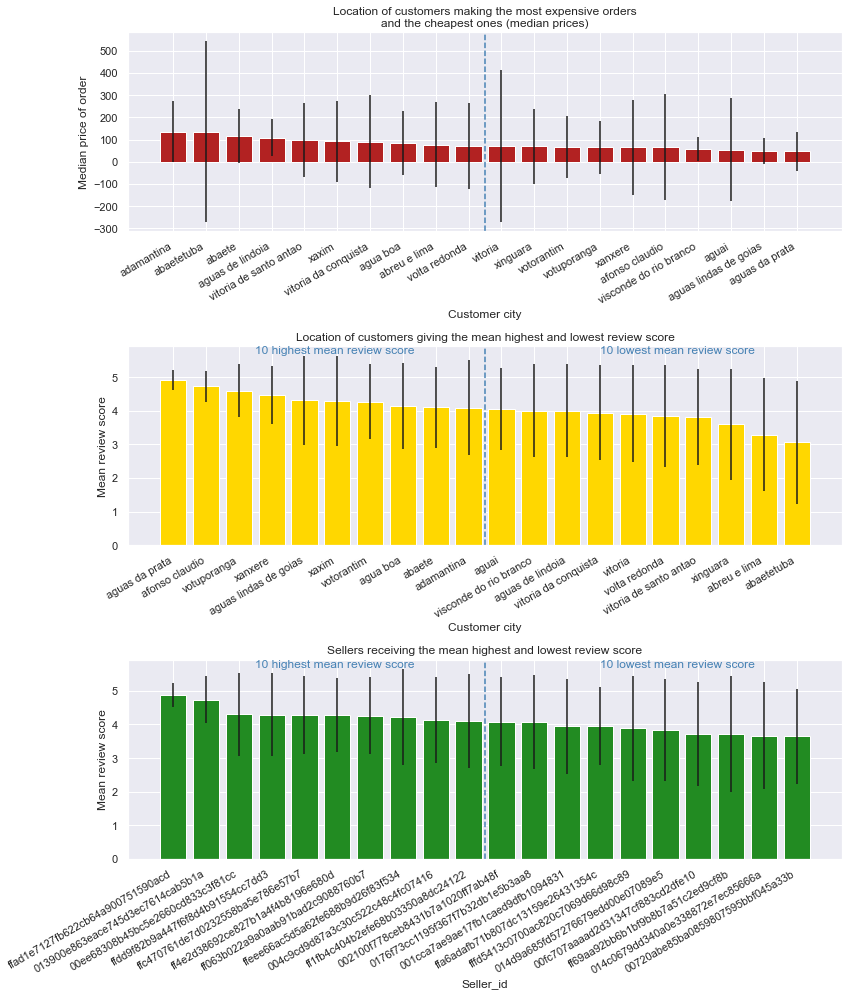

In [208]:
fig, ax = plt.subplots(3, 1, figsize=(12,14), tight_layout=True)

datas = [
    city_price_median, city_review_mean, seller_review_mean
    ]
stds = [
    city_price_std, city_review_std, seller_review_std
    ]
colors = [
    'firebrick', 'gold', 'forestgreen'
    ]
titles = [
    'Location of customers making the most expensive orders\nand the cheapest ones (median prices)',
    'Location of customers giving the mean highest and lowest review score', 
    'Sellers receiving the mean highest and lowest review score'
    ]
x_labels=[
    'Customer city', 'Customer city', 'Seller_id'
    ]
y_labels=[
    'Median price of order', 'Mean review score',  'Mean review score'
    ]

for axe, dat, std, colo, title, xlab, ylab in zip(range(3), datas, stds, colors, titles, x_labels, y_labels):  
    ax[axe].bar(height=dat, x=dat.index, yerr=std, color=colo)
    ax[axe].set_title(title)
    ax[axe].set_xticks(dat.index)
    ax[axe].set_xticklabels(dat.index, rotation=30, ha='right')
    ax[axe].set_xlabel(xlab)
    ax[axe].set_ylabel(ylab)
    ax[axe].axvline(x=9.5, color='steelblue', linestyle='--')

ax[0].annotate('10 most expensive (median)', xy=(2.5,800), color='steelblue')
ax[0].annotate('10 cheapest (median)', xy=(13,800), color='steelblue')

for axe in [1, 2]:
    ax[axe].annotate('10 highest mean review score', xy=(2.5,5.7), color='steelblue')
    ax[axe].annotate('10 lowest mean review score', xy=(13,5.7), color='steelblue')

#fig.savefig("loc_best_worst_cust_sellers.png", bbox_inches="tight", dpi=150);

We take only the 10 first and last customer city and seller id. According to statistics, Abadiania and Abaetetuba are the region of the customers buying the most expensive goods, but for the first one, there are very few orders, and the standard deviation of the second is very large.

Overall, the standard deviations are large, and it is better to be carefull with these graphs. A deeper exploration is required.

### Temporal evolution of orders and delivery

We can now focus on the temporal evolution of orders: 
* are customers paying at the moment of their order or later?
* how much time span between purchase and delivery?
* are estimated delivery dates correct overall?
* do the time span between order and delivery or mismatch between estimated and real delivery date influence the review score?

In [209]:
order_purchase_timestamp_d = data_full.groupby(
    pd.Grouper(key='order_purchase_timestamp', freq='D')
    ).count()['order_id']
order_approved_at_d = data_full.groupby(
    pd.Grouper(key='order_approved_at', freq='D')).count()['order_id']
order_delivered_carrier_date_d = data_full.groupby(
    pd.Grouper(key='order_delivered_carrier_date', freq='D')
    ).count()['order_id']
order_delivered_customer_date_d = data_full.groupby(
    pd.Grouper(key='order_delivered_customer_date', freq='D')
    ).count()['order_id']
order_estimated_delivery_date_d = data_full.groupby(
    pd.Grouper(key='order_estimated_delivery_date', freq='D')
    ).count()['order_id']
shipping_limit_date_d = data_full.groupby(
    pd.Grouper(key='shipping_limit_date', freq='D')
    ).count()['order_id']

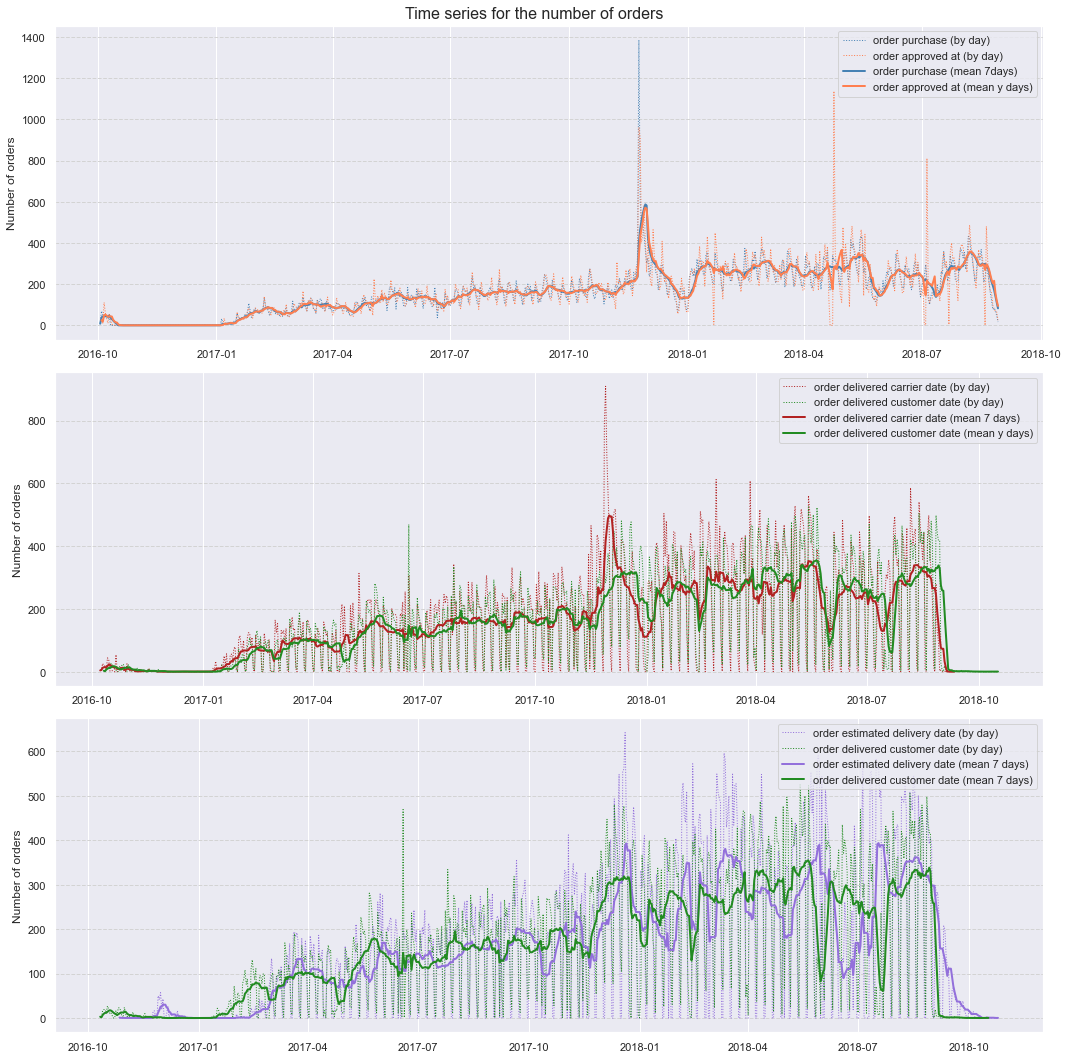

In [210]:
p1_3_data = [
    order_purchase_timestamp_d, order_delivered_carrier_date_d, order_estimated_delivery_date_d
    ]
p2_4_data = [
    order_approved_at_d, order_delivered_customer_date_d, order_delivered_customer_date_d
    ]
p1_labels = [
    'order purchase (by day)', 'order delivered carrier date (by day)', 
    'order estimated delivery date (by day)'
    ]
p2_labels = [
    'order approved at (by day)', 'order delivered customer date (by day)',
    'order delivered customer date (by day)'
    ]
p3_labels = [
    'order purchase (mean 7days)', 'order delivered carrier date (mean 7 days)',
    'order estimated delivery date (mean 7 days)'
    ]
p4_labels = [
    'order approved at (mean y days)', 'order delivered customer date (mean y days)',
    'order delivered customer date (mean 7 days)'
    ]
p1_3_colors = [
    'steelblue', 'firebrick', 'mediumpurple'
    ]
p2_4_colors = [
    'coral', 'forestgreen', 'forestgreen'
    ]

fig, ax = plt.subplots(3, 1, figsize=(15,15), tight_layout=True)

fig.suptitle('Time series for the number of orders')

for sp, data13, data24, label1, label2, label3, label4, color13, color24 in zip(range(3), p1_3_data, p2_4_data, p1_labels,
                                                                               p2_labels, p3_labels, p4_labels,
                                                                               p1_3_colors, p2_4_colors):
    
    ax[sp].plot(data13.index, data13, label=label1, linewidth=1, linestyle='dotted', color=color13, zorder=3)
    ax[sp].plot(data24.index, data24, label=label2, linewidth=1, linestyle='dotted', color=color24, zorder=3)
    ax[sp].plot(data13.index, data13.rolling('7D').mean(), label=label3, linewidth=2, color=color13, zorder=3)
    ax[sp].plot(data24.index, data24.rolling('7D').mean(), label=label4, linewidth=2, color=color24, zorder=3)
    
    ax[sp].grid(axis="y", which="major", linestyle="--", color="lightgrey", zorder=3)
    ax[sp].legend(loc="upper right")
    ax[sp].set_ylabel('Number of orders')

#fig.savefig("time_series.png", bbox_inches="tight", dpi=150);

* At a given time, number of orders and payments are very close with sligth mismatch starting in April 2018.
* Delay between posting and delivery time is highly increasing from December 2017 on (Christmas).
* There is a non-negligeable mismatch between estimated and real delivery date, increasing from January 2018.

In [211]:
# Count number of orders for each day of the week on the full dataset:
order_purchase_timestamp_d = data_full.groupby(
    pd.Grouper(key='order_purchase_timestamp', freq='D')
    ).count()['order_id'].reset_index()
order_purchase_timestamp_d['day_of_week'] = order_purchase_timestamp_d['order_purchase_timestamp'].dt.dayofweek
order_purchase_timestamp_d['day_of_week'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 
                                                   4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)
order_purchase_timestamp_d.rename(columns={'order_id':'number_of_orders'}, inplace=True)
order_purchase_timestamp_d = order_purchase_timestamp_d.groupby(
    'day_of_week').mean().reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    )

Text(0, 0.5, 'Number of orders')

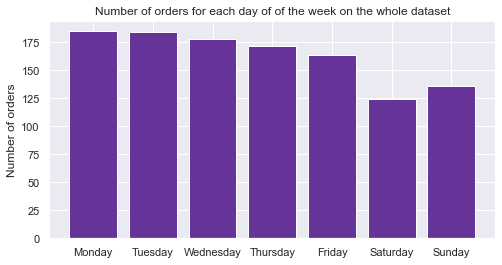

In [212]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(height=order_purchase_timestamp_d['number_of_orders'], 
    x=order_purchase_timestamp_d.index, color='rebeccapurple'
    )
ax.set_title('Number of orders for each day of of the week on the whole dataset')
ax.set_ylabel('Number of orders')

#fig.savefig("days_orders.png", bbox_inches="tight", dpi=150);

Customers are ordering more at the beginning of the week. The week-ends are the least prefered moment of purchase.

### Customers satisfaction: delivery delays and prices

We can wonder is there is a large gap between estimated and actual delivery date, and if unexpected delays have an influence on review scores.

Besides, we will also check wether the price of order have an influence on the review score: do customers buying expensive items are more satisfied (either because of the genuine satisfaction in buying and expensive item or because expensive items have an overall better quality)?

In [213]:
# Make the difference between expected and actual delivery dates, convert to float:
data_full['difference_delivery_estimated'] = data_full['order_estimated_delivery_date'] - data_full['order_delivered_customer_date']
data_full['difference_delivery_estimated_float'] = data_full['difference_delivery_estimated']/pd.Timedelta(days=1)

In [214]:
print(f'Mean difference between estimated and actual delivery date: \
    {data_full["difference_delivery_estimated"].mean()}')
print(f'25% of orders have less than \
    {np.quantile(data_full["difference_delivery_estimated_float"], 0.25):.2f} \
    days of difference between estimated and actual delivery date (Q1).'
    )
print(f'75% of orders have less than \
    {np.quantile(data_full["difference_delivery_estimated_float"], 0.75):.2f} \
    days of difference between estimated and actual delivery date (Q3).')
print(f'{data_full[data_full["difference_delivery_estimated_float"]<0].shape[0]/data_full.shape[0]*100:.2f}% \
    of orders are delivered later than estimated delivery date.')

Mean difference between estimated and actual delivery date:     11 days 08:40:27.630085695
25% of orders have less than     6.51     days of difference between estimated and actual delivery date (Q1).
75% of orders have less than     16.32     days of difference between estimated and actual delivery date (Q3).
7.81%     of orders are delivered later than estimated delivery date.


Most order are arriving earlier than estimated. Less then 8% are late.

We will define "very late" packages as the ones belonging to the 50% most late packages and "very early" packages as the ones belonging to the 50% most early packages. Others will be "early" or "late".

With the same idea, we will define "very cheap", "cheap", "expensive" and "very expensive" categories based on quartiles and median of **order** prices.

In [215]:
# Defining a categorical variable based on difference between estimated and actual delivery date:
late_packages_med = data_full[data_full['difference_delivery_estimated_float']<0]['difference_delivery_estimated_float'].median()
early_packages_med = data_full[data_full['difference_delivery_estimated_float']>=0]['difference_delivery_estimated_float'].median()

conditions = [
    data_full['difference_delivery_estimated_float']<late_packages_med,
    (data_full['difference_delivery_estimated_float']>=late_packages_med) & (data_full['difference_delivery_estimated_float']<0),
    (data_full['difference_delivery_estimated_float']<=early_packages_med) & (data_full['difference_delivery_estimated_float']>=0),
    data_full['difference_delivery_estimated_float']>early_packages_med
    ]

timing_delivery = [
    'very late', 'late', 'early', 'very early'
    ]

data_full['timing_delivery'] = np.select(conditions, timing_delivery)

# Create a Series of mean review score grouped by delivery timing:
mean_review_timing = data_full.groupby('timing_delivery')['review_score'].mean()
mean_review_timing = mean_review_timing.reindex(index=['very late', 'late', 'early', 'very early'])

Text(0, 0.5, 'Mean review score')

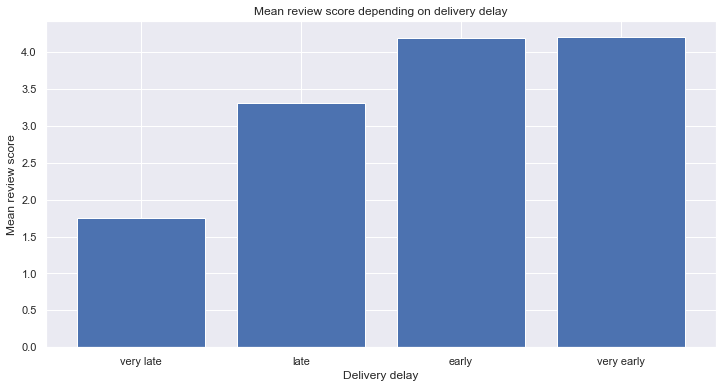

In [216]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x = mean_review_timing.index, height=mean_review_timing)
ax.set_title('Mean review score depending on delivery delay')
ax.set_xlabel('Delivery delay')
ax.set_ylabel('Mean review score')

#fig.savefig("delivery_delay_review.png", bbox_inches="tight", dpi=150);

In [217]:
q1 = data_full.groupby('product_category_name_english')['price'].quantile(0.25)
q3 = data_full.groupby('product_category_name_english')['price'].quantile(0.75)
med = data_full.groupby('product_category_name_english')['price'].median()

prices_cat_stats = pd.DataFrame({'Q1':q1, 'median':med, 'Q3':q3})
prices_cat_stats.reset_index(inplace=True)

Text(0, 0.5, 'Review score')

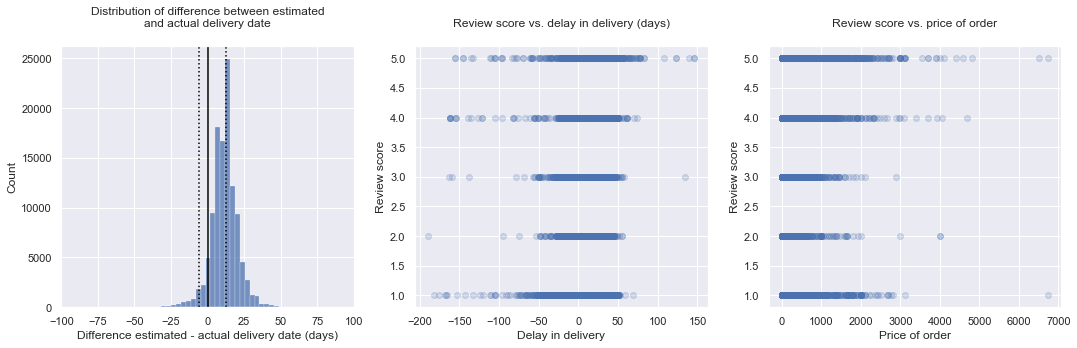

In [218]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), tight_layout=True)

sns.histplot(ax=ax[0], data=data_full['difference_delivery_estimated_float'], bins=100)
ax[0].set_title('Distribution of difference between estimated\nand actual delivery date', pad=20)
ax[0].set_xlabel('Difference estimated - actual delivery date (days)')
ax[0].set_xlim(-100, 100)
ax[0].axvline(x=0, color='black')
ax[0].axvline(x=late_packages_med, color='black', linestyle='dotted')
ax[0].axvline(x=early_packages_med, color='black', linestyle='dotted')

ax[1].scatter(data_full['difference_delivery_estimated_float'], data_full['review_score'], alpha=0.2)
ax[1].set_title('Review score vs. delay in delivery (days)', pad=20)
ax[1].set_xlabel('Delay in delivery')
ax[1].set_ylabel('Review score')


ax[2].scatter(data_full['price'], data_full['review_score'], alpha=0.2)
ax[2].set_title('Review score vs. price of order', pad=20)
ax[2].set_xlabel('Price of order')
ax[2].set_ylabel('Review score')

#fig.savefig("delivery_delay_review_distrib.png", bbox_inches="tight", dpi=150);

## Feature engineering

We will create new columns containing pertinent information per unique customer.

### Merging, filling NaN et feature engineering on orders, order_reviews and order_payment datasets

First let's create new features on the review dataset:
* Timelapse between review creation date and customer answer (if any)
* Binary variable presence (1) or absence (0) of title/message
* Mean review score (some order have several reviews)
* Probability to have a review message or title on that order (some order have several reviews)
* Mean timelapse between review creation and customer answer (float in days)

In [219]:
# Timelapse between review creation date and customer answer (if any):
order_reviews['timelapse_review_creation_answer'] = order_reviews['review_answer_timestamp'] - order_reviews['review_creation_date']

# Binary variables for presence/absence of title and comment:
order_reviews['review_msg_yn'] = np.where(order_reviews['review_comment_message'].isna(), 0, 1)
order_reviews['review_title_yn'] = np.where(order_reviews['review_comment_title'].isna(), 0, 1)

In [220]:
# Reviews info grouped by order_id with review_id, number of review, mean score, probability to have a message/title and mean timelapse:
order_reviews_fe = order_reviews.groupby('order_id', as_index=True).agg(
    review_id = pd.NamedAgg(column='review_id', aggfunc=lambda x: list(x)), 
    review_score_mean = pd.NamedAgg(column='review_score', aggfunc='mean'),
    proba_review_title = pd.NamedAgg(column='review_title_yn', aggfunc='mean'),
    proba_review_msg = pd.NamedAgg(column='review_msg_yn', aggfunc='mean'),
    timelapse_review_creation_answer_mean = pd.NamedAgg(
        column='timelapse_review_creation_answer', aggfunc=lambda x: (x/pd.Timedelta(days=1)).mean()
        )
    )

In [221]:
order_reviews_fe.head()

review_id  \
order_id                                                               
00010242fe8c5a6d1ba2dd792cb16214  [97ca439bc427b48bc1cd7177abe71365]   
00018f77f2f0320c557190d7a144bdd3  [7b07bacd811c4117b742569b04ce3580]   
000229ec398224ef6ca0657da4fc703e  [0c5b33dea94867d1ac402749e5438e8b]   
00024acbcdf0a6daa1e931b038114c75  [f4028d019cb58564807486a6aaf33817]   
00042b26cf59d7ce69dfabb4e55b4fd9  [940144190dcba6351888cafa43f3a3a5]   

                                  review_score_mean  proba_review_title  \
order_id                                                                  
00010242fe8c5a6d1ba2dd792cb16214               5.00                0.00   
00018f77f2f0320c557190d7a144bdd3               4.00                0.00   
000229ec398224ef6ca0657da4fc703e               5.00                0.00   
00024acbcdf0a6daa1e931b038114c75               4.00                0.00   
00042b26cf59d7ce69dfabb4e55b4fd9               5.00                0.00   

                                  proba_review_msg  \
order_id                                             
00010242fe8c5a6d1ba2dd792cb16214              1.00   
00018f77f2f0320c557190d7a144bdd3              0.00   
000229ec398224ef6ca0657da4fc703e              1.00   
00024acbcdf0a6daa1e931b038114c75              0.00   
00042b26cf59d7ce69dfabb4e55b4fd9              1.00   

                                  timelapse_review_creation_answer_mean  
order_id                                                                 
00010242fe8c5a6d1ba2dd792cb16214                                   1.46  
00018f77f2f0320c557190d7a144bdd3                                   2.48  
000229ec398224ef6ca0657da4fc703e                                   0.67  
00024acbcdf0a6daa1e931b038114c75                                   0.69  
00042b26cf59d7ce69dfabb4e55b4fd9                                   1.45

For the `order_payments` dataset, we extract:
* The number of payments,
* How many different type of payments were used,
* The different payment types used

In [222]:
order_payments_fe = order_payments.groupby('order_id', as_index=True).agg(
    n_payments = pd.NamedAgg(column='payment_sequential', aggfunc='max'), 
    n_payment_types = pd.NamedAgg(column='payment_type', aggfunc=lambda x: len(set(x))), 
    payment_types = pd.NamedAgg(column='payment_type', aggfunc=lambda x: list(set(x)))
    )

In [223]:
order_payments_fe.head()

n_payments  n_payment_types  payment_types
order_id                                                                    
00010242fe8c5a6d1ba2dd792cb16214           1                1  [credit_card]
00018f77f2f0320c557190d7a144bdd3           1                1  [credit_card]
000229ec398224ef6ca0657da4fc703e           1                1  [credit_card]
00024acbcdf0a6daa1e931b038114c75           1                1  [credit_card]
00042b26cf59d7ce69dfabb4e55b4fd9           1                1  [credit_card]

For the details of each order, we keep:
* the products id
* the number of products ordered
* the categories of products
* the price of order (sum of products price, **not** including freight value)
* the sellers id
* the number of different sellers per order
* zip codes, cities and states of the sellers

In [224]:
products_cat = pd.merge(
    products, categories, on='product_category_name', how='left'
    )
order_items_fe = pd.merge(
    order_items, products_cat, on='product_id', how='left'
    )
order_items_fe = pd.merge(
    order_items_fe, sellers, on='seller_id', how='outer'
    )

In [225]:
order_items_fe.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  0188777fe321843a18be24a6e9aa1e53              1   
2  0191bbb5166d4b9a68df11797d5acfa9              1   
3  03054d8a8eefc2981cfad06f58e27979              1   
4  0c325ea6925de749e1420be0cf43587c              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  436c8d57ff8d4aa254318e9bd9b48c83  48436dade18ac8b2bce089ec2a041202   
2  ec02a5d380128f7a188e9ce8f3ddd832  48436dade18ac8b2bce089ec2a041202   
3  3e31fd1419cc4cd6adad1925e72e3a03  48436dade18ac8b2bce089ec2a041202   
4  3a135477bf41350a0b1d8afdf616d446  48436dade18ac8b2bce089ec2a041202   

  shipping_limit_date  price  freight_value product_category_name  \
0 2017-09-19 09:45:35  58.90          13.29            cool_stuff   
1 2017-07-31 14:35:11  55.90           9.94            cool_stuff   
2 2017-08-16 12:30:15 132.90          20.17            cool_stuff   
3 2017-10-09 10:35:11  58.90          15.16            cool_stuff   
4 2017-07-06 15:43:50 139.90          16.74            brinquedos   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                58.00                      598.00                4.00   
1                54.00                      599.00                6.00   
2                59.00                      599.00                2.00   
3                52.00                     1170.00                1.00   
4                56.00                      928.00                3.00   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0            650.00              28.00               9.00             14.00   
1            530.00              30.00               9.00             14.00   
2           2275.00              45.00              25.00             18.00   
3            400.00              25.00              10.00             11.00   
4            600.00              52.00               9.00             19.00   

  product_category_name_english  seller_zip_code_prefix    seller_city  \
0                    cool_stuff                   27277  volta redonda   
1                    cool_stuff                   27277  volta redonda   
2                    cool_stuff                   27277  volta redonda   
3                    cool_stuff                   27277  volta redonda   
4                          toys                   27277  volta redonda   

  seller_state  
0           SP  
1           SP  
2           SP  
3           SP  
4           SP

To avoid problem with `NaN` due to orders not completed (canceld/unavailable), we need to add theses orders to the order_items dataset and fill missing values **prior** to merge datasets.

We will fill missing values with:
* `Unknown` for categorical data (`product_id`, `product_category_name`, `product_category_name_english`, `seller_id`, `seller_city`, `seller_state`)
* `-1` for numerical data (`order_item_id`, `freight_value`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`, `seller_zip_code_prefix`)
* except for `price`that will be set to `0`
* 2019/01/01 for `shipping_limit_date` (this column will be deleted later)

In [226]:
# Find ids of orders with missing info:
orders_with_items = set(order_items_fe.order_id)
orders_in_orders = set(orders.order_id)
ids_no_items = orders_in_orders - orders_with_items
print(f'There are {len(ids_no_items)} orders without items/sellers informations.')

There are 775 orders without items/sellers informations.


In [227]:
# We create a dataframe with uncomplete orders and fill it with missing values:
order_items_toadd = pd.DataFrame({'order_id':list(ids_no_items), 'order_item_id':-1, 'product_id':'Unknown', 
    'seller_id':'Unknown', 'shipping_limit_date':pd.Timestamp(2019,1,1), 
    'price':0, 'freight_value':-1, 'product_category_name':'Unknown',
    'product_name_lenght':-1, 'product_description_lenght':-1, 
    'product_photos_qty': -1, 'product_weight_g':-1, 'product_length_cm':-1,
    'product_height_cm':-1, 'product_width_cm':-1, 'product_category_name_english':'Unknown',
    'seller_zip_code_prefix':-1, 'seller_city':'Unknown', 'seller_state':'Unknown'})

# Then concatenate it to order_items_fe:
order_items_fe = pd.concat([order_items_fe, order_items_toadd])

In [228]:
order_items_fe = order_items_fe.groupby('order_id', as_index=True).agg(
    product_id = pd.NamedAgg(column='product_id', aggfunc=lambda x: list(set(x))), 
    n_products = pd.NamedAgg(column='order_item_id', aggfunc='max'), 
    product_category_name_english = pd.NamedAgg(column='product_category_name_english', aggfunc=lambda x: list(set(x))), 
    seller_id = pd.NamedAgg(column='seller_id', aggfunc=lambda x: list(set(x))),
    n_sellers = pd.NamedAgg(column='seller_id', aggfunc=lambda x: len(set(x))),
    seller_zip_code_prefix = pd.NamedAgg(column='seller_zip_code_prefix', aggfunc=lambda x: list(set(x))),
    seller_city = pd.NamedAgg(column='seller_city', aggfunc=lambda x: list(set(x))),
    seller_state = pd.NamedAgg(column='seller_state', aggfunc=lambda x: list(set(x))),
    price_order = pd.NamedAgg(column='price', aggfunc='sum')
    )

In [229]:
order_items_fe.head()

product_id  \
order_id                                                               
00010242fe8c5a6d1ba2dd792cb16214  [4244733e06e7ecb4970a6e2683c13e61]   
00018f77f2f0320c557190d7a144bdd3  [e5f2d52b802189ee658865ca93d83a8f]   
000229ec398224ef6ca0657da4fc703e  [c777355d18b72b67abbeef9df44fd0fd]   
00024acbcdf0a6daa1e931b038114c75  [7634da152a4610f1595efa32f14722fc]   
00042b26cf59d7ce69dfabb4e55b4fd9  [ac6c3623068f30de03045865e4e10089]   

                                  n_products product_category_name_english  \
order_id                                                                     
00010242fe8c5a6d1ba2dd792cb16214           1                  [cool_stuff]   
00018f77f2f0320c557190d7a144bdd3           1                    [pet_shop]   
000229ec398224ef6ca0657da4fc703e           1             [furniture_decor]   
00024acbcdf0a6daa1e931b038114c75           1                   [perfumery]   
00042b26cf59d7ce69dfabb4e55b4fd9           1                [garden_tools]   

                                                           seller_id  \
order_id                                                               
00010242fe8c5a6d1ba2dd792cb16214  [48436dade18ac8b2bce089ec2a041202]   
00018f77f2f0320c557190d7a144bdd3  [dd7ddc04e1b6c2c614352b383efe2d36]   
000229ec398224ef6ca0657da4fc703e  [5b51032eddd242adc84c38acab88f23d]   
00024acbcdf0a6daa1e931b038114c75  [9d7a1d34a5052409006425275ba1c2b4]   
00042b26cf59d7ce69dfabb4e55b4fd9  [df560393f3a51e74553ab94004ba5c87]   

                                  n_sellers seller_zip_code_prefix  \
order_id                                                             
00010242fe8c5a6d1ba2dd792cb16214          1                [27277]   
00018f77f2f0320c557190d7a144bdd3          1                 [3471]   
000229ec398224ef6ca0657da4fc703e          1                [37564]   
00024acbcdf0a6daa1e931b038114c75          1                [14403]   
00042b26cf59d7ce69dfabb4e55b4fd9          1                [87900]   

                                      seller_city seller_state  price_order  
order_id                                                                     
00010242fe8c5a6d1ba2dd792cb16214  [volta redonda]         [SP]        58.90  
00018f77f2f0320c557190d7a144bdd3      [sao paulo]         [SP]       239.90  
000229ec398224ef6ca0657da4fc703e  [borda da mata]         [MG]       199.00  
00024acbcdf0a6daa1e931b038114c75         [franca]         [SP]        12.99  
00042b26cf59d7ce69dfabb4e55b4fd9         [loanda]         [PR]       199.90

We will fill `NaN` values of the column `order_delivered_customer_date` with a fictive date of 1st january 2021. This will allow us to keep undelivered orders data in the agregated dataset. We must keep in mind that delivery time > 2 years correspond to canceled orders/lost packages.

In [230]:
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].fillna(pd.Timestamp(2021,1,1))

Now we will create variables for:
* `delivery_time`: difference between order timestamp and delivery to customer (in time delta and float formats)
* `delivery_difference`: difference between expected and true delivery dates (in time delta and float formats)
* `delivered_yn`: binary variable indicating whether the order was delivered (1) or not (0)

In [231]:
orders['delivery_time'] = orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']
orders['delivery_time_days'] = orders['delivery_time'] / pd.Timedelta(days=1)
orders['delivery_difference'] = orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']
orders['delivery_difference_days'] = orders['delivery_difference'] / pd.Timedelta(days=1)
orders['delivered_yn'] = np.where(orders['order_status']=='delivered', 1, 0)

In [232]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date    delivery_time  delivery_time_days  \
0                    2017-10-18  8 days 10:28:40                8.44   
1                    2018-08-13 13 days 18:46:08               13.78   
2                    2018-09-04  9 days 09:27:40                9.39   
3                    2017-12-15 13 days 05:00:36               13.21   
4                    2018-02-26  2 days 20:58:23                2.87   

  delivery_difference  delivery_difference_days  delivered_yn  
0     7 days 02:34:47                      7.11             1  
1     5 days 08:32:15                      5.36             1  
2    17 days 05:53:31                     17.25             1  
3    12 days 23:31:18                     12.98             1  
4     9 days 05:42:58                      9.24             1

Now we can finally merge all orders info:

In [233]:
order_items_fe.reset_index(inplace=True)
order_payments_fe.reset_index(inplace=True)
order_reviews_fe.reset_index(inplace=True)

orders_all_fe = pd.merge(
    orders, order_items_fe, on='order_id', how='outer'
    )
orders_all_fe = pd.merge(
    orders_all_fe, order_payments_fe, on='order_id', how='outer'
    )
orders_all_fe = pd.merge(
    orders_all_fe, order_reviews_fe, on='order_id', how='outer'
    )

# Drop 2 not very informative columns:
orders_all_fe.drop(columns=['order_approved_at', 'order_delivered_carrier_date'], inplace=True)

In [234]:
orders_all_fe.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp order_delivered_customer_date  \
0    delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
1    delivered      2018-07-24 20:41:37           2018-08-07 15:27:45   
2    delivered      2018-08-08 08:38:49           2018-08-17 18:06:29   
3    delivered      2017-11-18 19:28:06           2017-12-02 00:28:42   
4    delivered      2018-02-13 21:18:39           2018-02-16 18:17:02   

  order_estimated_delivery_date    delivery_time  delivery_time_days  \
0                    2017-10-18  8 days 10:28:40                8.44   
1                    2018-08-13 13 days 18:46:08               13.78   
2                    2018-09-04  9 days 09:27:40                9.39   
3                    2017-12-15 13 days 05:00:36               13.21   
4                    2018-02-26  2 days 20:58:23                2.87   

  delivery_difference  delivery_difference_days  delivered_yn  \
0     7 days 02:34:47                      7.11             1   
1     5 days 08:32:15                      5.36             1   
2    17 days 05:53:31                     17.25             1   
3    12 days 23:31:18                     12.98             1   
4     9 days 05:42:58                      9.24             1   

                           product_id  n_products  \
0  [87285b34884572647811a353c7ac498a]           1   
1  [595fac2a385ac33a80bd5114aec74eb8]           1   
2  [aa4383b373c6aca5d8797843e5594415]           1   
3  [d0b61bfb1de832b15ba9d266ca96e5b0]           1   
4  [65266b2da20d04dbe00c5c2d3bb7859e]           1   

  product_category_name_english                           seller_id  \
0                  [housewares]  [3504c0cb71d7fa48d967e0e4c94d59d9]   
1                   [perfumery]  [289cdb325fb7e7f891c38608bf9e0962]   
2                        [auto]  [4869f7a5dfa277a7dca6462dcf3b52b2]   
3                    [pet_shop]  [66922902710d126a0e7d26b0e3805106]   
4                  [stationery]  [2c9e548be18521d1c43cde1c582c6de8]   

   n_sellers seller_zip_code_prefix        seller_city seller_state  \
0          1                 [9350]             [maua]         [SP]   
1          1                [31570]   [belo horizonte]         [SP]   
2          1                [14840]          [guariba]         [SP]   
3          1                [31842]   [belo horizonte]         [MG]   
4          1                 [8752]  [mogi das cruzes]         [SP]   

   price_order  n_payments  n_payment_types           payment_types  \
0        29.99        3.00             2.00  [credit_card, voucher]   
1       118.70        1.00             1.00                [boleto]   
2       159.90        1.00             1.00           [credit_card]   
3        45.00        1.00             1.00           [credit_card]   
4        19.90        1.00             1.00           [credit_card]   

                            review_id  review_score_mean  proba_review_title  \
0  [a54f0611adc9ed256b57ede6b6eb5114]               4.00                0.00   
1  [8d5266042046a06655c8db133d120ba5]               4.00                1.00   
2  [e73b67b67587f7644d5bd1a52deb1b01]               5.00                0.00   
3  [359d03e676b3c069f62cadba8dd3f6e8]               5.00                0.00   
4  [e50934924e227544ba8246aeb3770dd4]               5.00                0.00   

   proba_review_msg  timelapse_review_creation_answer_mean  
0              1.00                                   1.16  
1              1.00                                   0.78  
2              0.00                                   4.80  


We now have all info, but with one line with missing a few columns:

In [235]:
pd.set_option('display.float_format', '{:.3f}'.format)
nan_col(orders_all_fe)

% NaN  % dispo
order_id                               0.000  100.000
customer_id                            0.000  100.000
order_status                           0.000  100.000
order_purchase_timestamp               0.000  100.000
order_delivered_customer_date          0.000  100.000
order_estimated_delivery_date          0.000  100.000
delivery_time                          0.000  100.000
delivery_time_days                     0.000  100.000
delivery_difference                    0.000  100.000
delivery_difference_days               0.000  100.000
delivered_yn                           0.000  100.000
product_id                             0.000  100.000
n_products                             0.000  100.000
product_category_name_english          0.000  100.000
seller_id                              0.000  100.000
n_sellers                              0.000  100.000
seller_zip_code_prefix                 0.000  100.000
seller_city                            0.000  100.000
seller_state                           0.000  100.000
price_order                            0.000  100.000
n_payments                             0.001   99.999
n_payment_types                        0.001   99.999
payment_types                          0.001   99.999
review_id                              0.000  100.000
review_score_mean                      0.000  100.000
proba_review_title                     0.000  100.000
proba_review_msg                       0.000  100.000
timelapse_review_creation_answer_mean  0.000  100.000

In [236]:
orders_all_fe[orders_all_fe['n_payments'].isna()]

order_id                       customer_id  \
30710  bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   

      order_status order_purchase_timestamp order_delivered_customer_date  \
30710    delivered      2016-09-15 12:16:38           2016-11-09 07:47:38   

      order_estimated_delivery_date    delivery_time  delivery_time_days  \
30710                    2016-10-04 54 days 19:31:00              54.813   

      delivery_difference  delivery_difference_days  delivered_yn  \
30710  -37 days +16:12:22                   -36.325             1   

                               product_id  n_products  \
30710  [5a6b04657a4c5ee34285d1e4619a96b4]           3   

      product_category_name_english                           seller_id  \
30710               [health_beauty]  [ecccfa2bb93b34a3bf033cc5d1dcdc69]   

       n_sellers seller_zip_code_prefix seller_city seller_state  price_order  \
30710          1                [81810]  [curitiba]         [PR]      134.970   

       n_payments  n_payment_types payment_types  \
30710         NaN              NaN           NaN   

                                review_id  review_score_mean  \
30710  [6916ca4502d6d3bfd39818759d55d536]              1.000   

       proba_review_title  proba_review_msg  \
30710               0.000             1.000   

       timelapse_review_creation_answer_mean  
30710                                  1.773

In [237]:
orders_all_fe.dropna(inplace=True)

### Merging, filling NaN et feature engineering on customers, geoloc and cities datasets

Let's make some cleaning on the population dataset:

In [238]:
cities.head()

IBGECode            LocalCidade LocalUF LocalEstado RegiaoBrasil  Latitude  \
0   1100015  ALTA FLORESTA D'OESTE      RO    Rondonia            N  -119 283   
1   1100023              ARIQUEMES      RO    Rondonia            N  -990 571   
2   1100031                 CABIXI      RO    Rondonia            N  -134 945   
3   1100049                 CACOAL      RO    Rondonia            N  -114 343   
4   1100056             CEREJEIRAS      RO    Rondonia            N   -13 187   

  Longitude       Gentilico  PopEstimada_2018  PopCenso 2010  IDHM  \
0  -619 953  alta-florense              23167          24392 0.641   
1  -630 325    ariquemense             106168          90353 0.702   
2   -60 552     cabixiense               5438           6313 0.650   
3  -614 562     cacoalense              84813          78574 0.718   
4  -608 168   cerejeirense              16444          17029 0.692   

   ReceitasRealizadas_2014  DespesasEmpenhadas_2014  Pib_2014  
0                    53490                    47577 16461.110  
1                        0                        0 19401.430  
2                    22635                    19354 18346.170  
3                   169636                   155473 20725.230  
4                    53147                    46774 22179.170

In [239]:
# Cleaning and keeping only relevant data:
cities['LocalCidade'] = cities['LocalCidade'].str.lower()
cities.drop(columns=['Gentilico', 'PopEstimada_2018', 'IDHM', 'ReceitasRealizadas_2014', 'DespesasEmpenhadas_2014', 
    'Pib_2014', 'Latitude', 'Longitude', 'IBGECode', 'LocalEstado', 'RegiaoBrasil'],inplace=True)
cities.rename(columns={'LocalCidade':'customer_city', 'PopCenso 2010':'customer_city_population_2010', 
    'LocalUF':'customer_state'}, inplace=True)

In [240]:
cities.head()

customer_city customer_state  customer_city_population_2010
0  alta floresta d'oeste             RO                          24392
1              ariquemes             RO                          90353
2                 cabixi             RO                           6313
3                 cacoal             RO                          78574
4             cerejeiras             RO                          17029

In [241]:
cities[cities['customer_city_population_2010']<1000]

customer_city customer_state  customer_city_population_2010
224    mojui dos campos             PA                              0
803             nazaria             PI                              0
3026   serra da saudade             MG                            815
3348               bora             SP                            805
4503     pescaria brava             SC                              0
4605   balneario rincao             SC                              0
4923     pinto bandeira             RS                              0
5160  paraiso das aguas             MS                              0

There is a cut apparently: below 805 inhabitants, cities didn't have census made. We will arbitrarily put 100 inhabitants in cities with 0 population and cities not in the population dataframe. This seems to correspond to the approximate size of the missing cities viewed with google map.

In [242]:
cities[cities['customer_city']=='guara']

customer_city customer_state  customer_city_population_2010
3468         guara             SP                          19858

In [243]:
cities['customer_city_population_2010'].replace({0:100}, inplace=True)

We will check whether we have all customer cities population info:

In [244]:
# Create sets and compare them:
cities_with_pop = set(cities['customer_city'])
customers_cities = set(customers.customer_city.unique())
no_pop = customers_cities - cities_with_pop
print(f'There are {len(no_pop)} cities in our customers dataset without population info.')

There are 261 cities in our customers dataset without population info.


In [245]:
# Cities present in customer dataset but not in cities dataset:
no_pop

{'abrantes',
 'adhemar de barros',
 'agisse',
 'aguas claras',
 'ajapi',
 'alexandra',
 'alexandrita',
 'alto alegre do iguacu',
 'alto sao joao',
 'amanari',
 'amparo da serra',
 'andrequice',
 'angelo frechiani',
 'angustura',
 'anhandui',
 'anta',
 'antonio pereira',
 'antunes',
 'aparecida de monte alto',
 'aparecida de sao manuel',
 'arace',
 'araguaia',
 'areia branca dos assis',
 'arembepe',
 'aribice',
 'arraial d ajuda',
 "arraial d'ajuda",
 'arrozal',
 'avelar',
 'azurita',
 'bacaxa',
 'baguari',
 'balneario picarras',
 "bandeirantes d'oeste",
 'barao ataliba nogueira',
 'barao de juparana',
 'barra de sao joao',
 'barra do tarrachil',
 'bataipora',
 'belem do sao francisco',
 'bemposta',
 'bom jesus do querendo',
 'bonfim paulista',
 'botelho',
 'braco do rio',
 'brazopolis',
 'brejo bonito',
 'cachoeira do brumado',
 'cachoeira do campo',
 'caldas do jorro',
 'california da barra',
 'cambiasca',
 'campo alegre de minas',
 'capao da porteira',
 'caraiba',
 'carajas',
 'carna

After a check on Google Maps, theses cities are small but still larger than simple villages and I estimate their population at about 1000 people today. To be consistant with the data (2010 census) I will add them to the cities dataset with 100 inhabitants (considering the population probably growed a lot in 10 years).

In [246]:
missing_cities = customers[customers['customer_city'].isin(no_pop)][['customer_city', 'customer_state']]
missing_cities.drop_duplicates(subset=['customer_city', 'customer_state'], inplace=True)
missing_cities['customer_city_population_2010'] = 100

cities = pd.concat([cities, missing_cities])
cities

customer_city customer_state  customer_city_population_2010
0      alta floresta d'oeste             RO                          24392
1                  ariquemes             RO                          90353
2                     cabixi             RO                           6313
3                     cacoal             RO                          78574
4                 cerejeiras             RO                          17029
...                      ...            ...                            ...
98375           serra bonita             MG                            100
98406           venda branca             SP                            100
98622            sanga puita             MS                            100
98878                 siriji             PE                            100
99224           monte bonito             RS                            100

[5831 rows x 3 columns]

We merge customers, geolocation and population info together:

In [247]:
customers_loc = pd.merge(customers, geoloc, on='customer_zip_code_prefix', how='left')
customers_loc = pd.merge(customers_loc, cities, on=['customer_city', 'customer_state'], how='left')

In [248]:
customers_loc.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

   geolocation_lat  geolocation_lng       geolocation_city geolocation_state  \
0          -20.510          -47.398                 franca                SP   
1          -23.727          -46.546  sao bernardo do campo                SP   
2          -23.528          -46.660              sao paulo                SP   
3          -23.497          -46.185        mogi das cruzes                SP   
4          -22.987          -47.151               campinas                SP   

   customer_city_population_2010  
0                     318640.000  
1                     765463.000  
2                   11253503.000  
3                     387779.000  
4                    1080113.000

In [249]:
nan_col(customers_loc)

% NaN  % dispo
customer_id                    0.000  100.000
customer_unique_id             0.000  100.000
customer_zip_code_prefix       0.000  100.000
customer_city                  0.000  100.000
customer_state                 0.000  100.000
geolocation_lat                0.280   99.720
geolocation_lng                0.280   99.720
geolocation_city               0.280   99.720
geolocation_state              0.280   99.720
customer_city_population_2010  0.071   99.929

We have missing latitude/longitude data. In the original dataset, they correspond to lat/lon of the neighbourhood (post-code). We want only one location by city to simplify map representation. We will keep the mean lat/lon for each city.

In [250]:
# Transforming post-code coordinates into mean city coordinates:
cities_coord = customers_loc.groupby('customer_city').agg(
    city_lat = pd.NamedAgg(column='geolocation_lat', aggfunc='mean'),
    city_lon = pd.NamedAgg(column='geolocation_lng', aggfunc='mean')
)
cities_coord.reset_index(inplace=True)

In [251]:
# Check missing values:
nan_col(cities_coord)

% NaN  % dispo
customer_city  0.000  100.000
city_lat       1.092   98.908
city_lon       1.092   98.908

In [252]:
# Cities for which we need lat/lon coordinates:
cities_coord[(cities_coord['city_lat'].isna()) | (cities_coord['city_lon'].isna())]['customer_city']

128                    alto sao joao
180                 angelo frechiani
294                          aribice
457                         bemposta
517            bom jesus do querendo
538                             bora
960                       cipo-guacu
1013            conceicao do formoso
1073                 corrego do ouro
1135                     cuite velho
1196                     doce grande
1213               domiciano ribeiro
1292               estevao de araujo
1433                          glaura
1537                          guinda
1557                        humildes
1602                        ibitioca
1740                           itabi
1893                         jacuipe
1903                      jaguarembe
1953                            jaua
2137                      luziapolis
2168                          maioba
2174                     major porto
2183                       mampituba
2336                           missi
2353                        monnerat
2

We will manually search for missing coordinates on Google Earth and add them to the dataset (they are in the coordinates supplementary datset).

In [253]:
coordinates.drop(columns='Unnamed: 0', inplace=True)
cities_coord = pd.concat([cities_coord, coordinates])
cities_coord.dropna(inplace=True)

In [254]:
cities_coord

customer_city  city_lat  city_lon
0        abadia dos dourados   -18.491   -47.398
1                  abadiania   -16.194   -48.711
2                     abaete   -19.161   -45.454
3                 abaetetuba    -1.724   -48.886
4                    abaiara    -7.341   -39.024
..                       ...       ...       ...
40      sao miguel do cambui   -23.610   -51.859
41    sao sebastiao da serra   -22.442   -48.011
42  sao sebastiao do paraiba   -21.755   -42.378
43                 sao vitor   -18.821   -41.689
44                    siriji    -7.654   -35.472

[4119 rows x 3 columns]

Merging with cities coordinates:

In [255]:
customers_loc = pd.merge(customers_loc, cities_coord, on='customer_city', how='left')
# Dropping specific info about post-code that we will not use:
customers_loc.drop(columns=['geolocation_lat', 'geolocation_lng', 'geolocation_city', 
    'geolocation_state'], inplace=True)

In [256]:
customers_loc.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

   customer_city_population_2010  city_lat  city_lon  
0                     318640.000   -20.531   -47.400  
1                     765463.000   -23.706   -46.564  
2                   11253503.000   -23.572   -46.633  
3                     387779.000   -23.528   -46.190  
4                    1080113.000   -22.902   -47.078

A few data have latitude in place of longitude and vice-versa:

In [257]:
customers_loc[customers_loc['city_lat']>6]

customer_id                customer_unique_id  \
24356  88aac7b0942dcdb41ebabf7811b106fc  2a4b1192846ec238d62df3838257bad9   
33165  85ffd918d7d043bc4aaec22621818908  67045ba793233569bed80ccf42e02070   
73532  5baf545acc5f10945f5f2751d5d23ecd  ba1f863dca8e24fc845fda7e6b9e98d0   
77084  816fa7cf00e01aaf19c7ad215b049c9b  9e68775971541ca8a79b6fce848e7aee   
84222  948b29e24216a05fea13a18d8db45ea5  6740f8899f3c70b5b08b2e0bad37e567   
84347  39660be50b511acaa1d93b9ecca96ff9  66596e08440320718dd23ea4d89ed37f   

       customer_zip_code_prefix           customer_city customer_state  \
24356                     68275         porto trombetas             PA   
33165                     83810  areia branca dos assis             PR   
73532                     83810  areia branca dos assis             PR   
77084                     68275         porto trombetas             PA   
84222                     83252      ilha dos valadares             PR   
84347                     83810  areia branca dos assis             PR   

       customer_city_population_2010  city_lat  city_lon  
24356                        100.000    41.146    -8.578  
33165                        100.000    39.058    -9.400  
73532                        100.000    39.058    -9.400  
77084                        100.000    41.146    -8.578  
84222                        100.000    42.184    -8.724  
84347                        100.000    39.058    -9.400

In [258]:
# Correct inversed lat/lon:
false_lat = [
            customers_loc.loc[24356, 'city_lat'], customers_loc.loc[33165, 'city_lat'], customers_loc.loc[73532, 'city_lat'],
            customers_loc.loc[77084, 'city_lat'], customers_loc.loc[84222, 'city_lat'], customers_loc.loc[84347, 'city_lat']
            ]
false_lon = [
            customers_loc.loc[24356, 'city_lon'], customers_loc.loc[33165, 'city_lon'], customers_loc.loc[73532, 'city_lon'],
            customers_loc.loc[77084, 'city_lon'], customers_loc.loc[84222, 'city_lon'], customers_loc.loc[84347, 'city_lon']
            ]

customers_loc.loc[24356, 'city_lat'], customers_loc.loc[33165, 'city_lat'], customers_loc.loc[73532, 'city_lat'], customers_loc.loc[77084, 'city_lat'], customers_loc.loc[84222, 'city_lat'], customers_loc.loc[84347, 'city_lat'] = false_lon[0], false_lon[1], false_lon[2], false_lon[3], false_lon[4], false_lon[5]
customers_loc.loc[24356, 'city_lon'], customers_loc.loc[33165, 'city_lon'], customers_loc.loc[73532, 'city_lon'], customers_loc.loc[77084, 'city_lon'], customers_loc.loc[84222, 'city_lon'], customers_loc.loc[84347, 'city_lon'] = false_lat[0], false_lat[1], false_lat[2], false_lat[3], false_lat[4], false_lat[5]

### Merging orders, customers and location info with aggregation per unique customer

In [259]:
# Merging to get unique customer id:
orders_all_fe = pd.merge(orders_all_fe, customers_loc, on='customer_id', how='outer')

In [260]:
orders_all_fe.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp order_delivered_customer_date  \
0    delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
1    delivered      2018-07-24 20:41:37           2018-08-07 15:27:45   
2    delivered      2018-08-08 08:38:49           2018-08-17 18:06:29   
3    delivered      2017-11-18 19:28:06           2017-12-02 00:28:42   
4    delivered      2018-02-13 21:18:39           2018-02-16 18:17:02   

  order_estimated_delivery_date    delivery_time  delivery_time_days  \
0                    2017-10-18  8 days 10:28:40               8.437   
1                    2018-08-13 13 days 18:46:08              13.782   
2                    2018-09-04  9 days 09:27:40               9.394   
3                    2017-12-15 13 days 05:00:36              13.209   
4                    2018-02-26  2 days 20:58:23               2.874   

  delivery_difference  delivery_difference_days  delivered_yn  \
0     7 days 02:34:47                     7.107         1.000   
1     5 days 08:32:15                     5.356         1.000   
2    17 days 05:53:31                    17.245         1.000   
3    12 days 23:31:18                    12.980         1.000   
4     9 days 05:42:58                     9.238         1.000   

                           product_id  n_products  \
0  [87285b34884572647811a353c7ac498a]       1.000   
1  [595fac2a385ac33a80bd5114aec74eb8]       1.000   
2  [aa4383b373c6aca5d8797843e5594415]       1.000   
3  [d0b61bfb1de832b15ba9d266ca96e5b0]       1.000   
4  [65266b2da20d04dbe00c5c2d3bb7859e]       1.000   

  product_category_name_english                           seller_id  \
0                  [housewares]  [3504c0cb71d7fa48d967e0e4c94d59d9]   
1                   [perfumery]  [289cdb325fb7e7f891c38608bf9e0962]   
2                        [auto]  [4869f7a5dfa277a7dca6462dcf3b52b2]   
3                    [pet_shop]  [66922902710d126a0e7d26b0e3805106]   
4                  [stationery]  [2c9e548be18521d1c43cde1c582c6de8]   

   n_sellers seller_zip_code_prefix        seller_city seller_state  \
0      1.000                 [9350]             [maua]         [SP]   
1      1.000                [31570]   [belo horizonte]         [SP]   
2      1.000                [14840]          [guariba]         [SP]   
3      1.000                [31842]   [belo horizonte]         [MG]   
4      1.000                 [8752]  [mogi das cruzes]         [SP]   

   price_order  n_payments  n_payment_types           payment_types  \
0       29.990       3.000            2.000  [credit_card, voucher]   
1      118.700       1.000            1.000                [boleto]   
2      159.900       1.000            1.000           [credit_card]   
3       45.000       1.000            1.000           [credit_card]   
4       19.900       1.000            1.000           [credit_card]   

                            review_id  review_score_mean  proba_review_title  \
0  [a54f0611adc9ed256b57ede6b6eb5114]              4.000               0.000   
1  [8d5266042046a06655c8db133d120ba5]              4.000               1.000   
2  [e73b67b67587f7644d5bd1a52deb1b01]              5.000               0.000   
3  [359d03e676b3c069f62cadba8dd3f6e8]              5.000               0.000   
4  [e50934924e227544ba8246aeb3770dd4]              5.000               0.000   

   proba_review_msg  timelapse_review_creation_answer_mean  \
0             1.000                                  1.155   
1             1.000                                  0.776   
2             0.000                                  4.797

In [261]:
nan_col(orders_all_fe)

% NaN  % dispo
order_id                               0.001   99.999
customer_id                            0.000  100.000
order_status                           0.001   99.999
order_purchase_timestamp               0.001   99.999
order_delivered_customer_date          0.001   99.999
order_estimated_delivery_date          0.001   99.999
delivery_time                          0.001   99.999
delivery_time_days                     0.001   99.999
delivery_difference                    0.001   99.999
delivery_difference_days               0.001   99.999
delivered_yn                           0.001   99.999
product_id                             0.001   99.999
n_products                             0.001   99.999
product_category_name_english          0.001   99.999
seller_id                              0.001   99.999
n_sellers                              0.001   99.999
seller_zip_code_prefix                 0.001   99.999
seller_city                            0.001   99.999
seller_state                           0.001   99.999
price_order                            0.001   99.999
n_payments                             0.001   99.999
n_payment_types                        0.001   99.999
payment_types                          0.001   99.999
review_id                              0.001   99.999
review_score_mean                      0.001   99.999
proba_review_title                     0.001   99.999
proba_review_msg                       0.001   99.999
timelapse_review_creation_answer_mean  0.001   99.999
customer_unique_id                     0.000  100.000
customer_zip_code_prefix               0.000  100.000
customer_city                          0.000  100.000
customer_state                         0.000  100.000
customer_city_population_2010          0.071   99.929
city_lat                               0.000  100.000
city_lon                               0.000  100.000

There is one customer without order info:

In [262]:
orders_all_fe[orders_all_fe['order_id'].isna()]

order_id                       customer_id order_status  \
99440      NaN  86dc2ffce2dfff336de2f386a786e574          NaN   

      order_purchase_timestamp order_delivered_customer_date  \
99440                      NaT                           NaT   

      order_estimated_delivery_date delivery_time  delivery_time_days  \
99440                           NaT           NaT                 NaN   

      delivery_difference  delivery_difference_days  delivered_yn product_id  \
99440                 NaT                       NaN           NaN        NaN   

       n_products product_category_name_english seller_id  n_sellers  \
99440         NaN                           NaN       NaN        NaN   

      seller_zip_code_prefix seller_city seller_state  price_order  \
99440                    NaN         NaN          NaN          NaN   

       n_payments  n_payment_types payment_types review_id  review_score_mean  \
99440         NaN              NaN           NaN       NaN                NaN   

       proba_review_title  proba_review_msg  \
99440                 NaN               NaN   

       timelapse_review_creation_answer_mean  \
99440                                    NaN   

                     customer_unique_id  customer_zip_code_prefix  \
99440  830d5b7aaa3b6f1e9ad63703bec97d23                     14600   

              customer_city customer_state  customer_city_population_2010  \
99440  sao joaquim da barra             SP                      46512.000   

       city_lat  city_lon  
99440   -20.581   -47.859

In [263]:
# Drop the single line with missing values:
orders_all_fe.dropna(inplace=True)

Now we aggregate all orders info per unique customer:

In [264]:
customers_unique = orders_all_fe.groupby('customer_unique_id').agg(
    order_id = pd.NamedAgg(column='order_id', aggfunc=lambda x: list(x)),
    n_orders = pd.NamedAgg(column='order_id', aggfunc=lambda x: len(list(x))),
    order_purchase_timestamp = pd.NamedAgg(column='order_purchase_timestamp', aggfunc=lambda x: list(x)),
    order_delivered_customer_date = pd.NamedAgg(column='order_delivered_customer_date', aggfunc=lambda x: list(x)),
    order_estimated_delivery_date = pd.NamedAgg(column='order_estimated_delivery_date', aggfunc=lambda x: list(x)),
    delivery_time = pd.NamedAgg(column='delivery_time', aggfunc=lambda x: list(x)),
    delivery_time_days_mean = pd.NamedAgg(column='delivery_time_days', aggfunc='mean'),
    delivery_difference = pd.NamedAgg(column='delivery_difference', aggfunc=lambda x: list(x)),
    delivery_difference_days_mean = pd.NamedAgg(column='delivery_difference_days', aggfunc='mean'),
    delivered_proba = pd.NamedAgg(column='delivered_yn', aggfunc='mean'),
    product_id = pd.NamedAgg(column='product_id', aggfunc=lambda x: list(set(x.sum()))),
    n_products_mean = pd.NamedAgg(column='n_products', aggfunc='mean'), 
    n_products_total = pd.NamedAgg(column='n_products', aggfunc='sum'), 
    product_category_name_english = pd.NamedAgg(column='product_category_name_english', aggfunc=lambda x: list(set(x.sum()))),
    seller_id = pd.NamedAgg(column='seller_id', aggfunc=lambda x: list(set(x.sum()))),
    n_sellers_mean = pd.NamedAgg(column='n_sellers', aggfunc='mean'), 
    n_sellers_total = pd.NamedAgg(column='n_sellers', aggfunc='sum'), 
    seller_city = pd.NamedAgg(column='seller_city', aggfunc=lambda x: list(set(x.sum()))),
    seller_state = pd.NamedAgg(column='seller_state', aggfunc=lambda x: list(set(x.sum()))),
    n_payments_mean = pd.NamedAgg(column='n_payments', aggfunc='mean'),
    payment_types = pd.NamedAgg(column='payment_types', aggfunc=lambda x: list(set(x.sum()))),
    price_order_mean = pd.NamedAgg(column='price_order', aggfunc='mean'),
    price_order_total = pd.NamedAgg(column='price_order', aggfunc='sum'),
    review_id = pd.NamedAgg(column='review_id', aggfunc=lambda x: list(set(x.sum()))),
    review_score_mean = pd.NamedAgg(column='review_score_mean', aggfunc='mean'),
    proba_review_title = pd.NamedAgg(column='proba_review_title', aggfunc='mean'),
    proba_review_msg = pd.NamedAgg(column='proba_review_msg', aggfunc='mean'),
    timelapse_review_creation_answer_mean = pd.NamedAgg(column='timelapse_review_creation_answer_mean', aggfunc='mean')
    )

We add a few more info geolocation info and drop duplicates due to multiple orders:

In [265]:
# Add a column with number of payment types used:
customers_unique['n_payment_types'] = customers_unique['payment_types'].apply(lambda x: len(x))

# Merge with geolocations:
customers_unique.reset_index(inplace=True)
customers_unique = pd.merge(customers_unique, customers_loc, on='customer_unique_id', how='left')

#Drop duplicates and not usefull columns:
customers_unique.drop_duplicates(subset='customer_unique_id', inplace=True)
customers_unique.drop(columns=['customer_id', 'customer_zip_code_prefix'], inplace=True)

#Check shape:
customers_unique.shape

(96029, 35)

In [266]:
nan_col(customers_unique)

% NaN  % dispo
customer_unique_id                     0.000  100.000
order_id                               0.000  100.000
n_orders                               0.000  100.000
order_purchase_timestamp               0.000  100.000
order_delivered_customer_date          0.000  100.000
order_estimated_delivery_date          0.000  100.000
delivery_time                          0.000  100.000
delivery_time_days_mean                0.000  100.000
delivery_difference                    0.000  100.000
delivery_difference_days_mean          0.000  100.000
delivered_proba                        0.000  100.000
product_id                             0.000  100.000
n_products_mean                        0.000  100.000
n_products_total                       0.000  100.000
product_category_name_english          0.000  100.000
seller_id                              0.000  100.000
n_sellers_mean                         0.000  100.000
n_sellers_total                        0.000  100.000
seller_city                            0.000  100.000
seller_state                           0.000  100.000
n_payments_mean                        0.000  100.000
payment_types                          0.000  100.000
price_order_mean                       0.000  100.000
price_order_total                      0.000  100.000
review_id                              0.000  100.000
review_score_mean                      0.000  100.000
proba_review_title                     0.000  100.000
proba_review_msg                       0.000  100.000
timelapse_review_creation_answer_mean  0.000  100.000
n_payment_types                        0.000  100.000
customer_city                          0.000  100.000
customer_state                         0.000  100.000
customer_city_population_2010          0.001   99.999
city_lat                               0.000  100.000
city_lon                               0.000  100.000

In [267]:
customers_unique[customers_unique['customer_city_population_2010'].isna()]

customer_unique_id                            order_id  \
98720  fe59d5878cd80080edbd29b5a0a4e1cf  [806d3b5f15557ad3d5288d340271151f]   

       n_orders order_purchase_timestamp order_delivered_customer_date  \
98720         1    [2017-08-14 12:18:15]         [2017-08-23 16:56:44]   

      order_estimated_delivery_date      delivery_time  \
98720         [2017-09-13 00:00:00]  [9 days 04:38:29]   

       delivery_time_days_mean delivery_difference  \
98720                    9.193  [20 days 07:03:16]   

       delivery_difference_days_mean  delivered_proba  \
98720                         20.294            1.000   

                               product_id  n_products_mean  n_products_total  \
98720  [a2307a34b16eb2201ce5206cbd7f9bc7]            1.000             1.000   

      product_category_name_english                           seller_id  \
98720                  [food_drink]  [cb3dd9ce66268c7a3ca7241ac70ab58c]   

       n_sellers_mean  n_sellers_total  seller_city seller_state  \
98720           1.000            1.000  [sao paulo]         [SP]   

       n_payments_mean  payment_types  price_order_mean  price_order_total  \
98720            1.000  [credit_card]            38.990             38.990   

                                review_id  review_score_mean  \
98720  [b1c51b592758ea67d768ea2defd39487]              3.000   

       proba_review_title  proba_review_msg  \
98720               0.000             0.000   

       timelapse_review_creation_answer_mean  n_payment_types customer_city  \
98720                                  1.053                1         guara   

      customer_state  customer_city_population_2010  city_lat  city_lon  
98720             DF                            NaN   -19.516   -47.848

In [268]:
customers_unique.loc[98720, 'customer_city_population_2010'] = 19858

For each customer we have:
* `order_id`, `product_id`, `seller_id`: the references of each order/products bought and corresponding seller
* `customer_state`, `customer_city`, `city_lat`, `city_lng`, `customer_city_population_2010`: state, city (with corresponding lat/lon) and number of inhabitants (in 2010) for the customer location.
* `order_purchase_timestamp`, `order_delivered_customer_date`, `order_estimated_delivery_date`: the different dates (order, delivery estimated, delivery)
* `delivery_time_days_mean`: timespan between order and delivery
* `delivery_difference_days_mean`: difference between estimated and real delivery date
* `n_orders`: number of orders
* `n_products_total`, `n_products_mean`: total number of products, mean number of product per order
* `delivered_proba`: proportion or orders correctly delivered (value between 0 and 1)
* `product_category_name_english`: categories of bought products
* `n_sellers_total`, `n_sellers_mean`: total number of sellers the customer bought from and mean per order
* `n_payment_types`, `n_payments_mean`: the total number of payment types used and mean per order
* `price_order_total`, `price_order_mean`: the total amount of money spent and mean amount per order (does not include freight value)
* `mean review score`: mean review score on all orders
* `proba_review_title`, `proba_review_msg`: proportion of orders that lead to a review message or review title (value between 0 and 1)
* `timelapse_review_creation_answer_mean`: mean timespan between review creation and answer of customer (in days)

In [269]:
customers_unique.head()

customer_unique_id                            order_id  \
0  0000366f3b9a7992bf8c76cfdf3221e2  [e22acc9c116caa3f2b7121bbb380d08e]   
1  0000b849f77a49e4a4ce2b2a4ca5be3f  [3594e05a005ac4d06a72673270ef9ec9]   
2  0000f46a3911fa3c0805444483337064  [b33ec3b699337181488304f362a6b734]   
3  0000f6ccb0745a6a4b88665a16c9f078  [41272756ecddd9a9ed0180413cc22fb6]   
4  0004aac84e0df4da2b147fca70cf8255  [d957021f1127559cd947b62533f484f7]   

   n_orders order_purchase_timestamp order_delivered_customer_date  \
0         1    [2018-05-10 10:56:27]         [2018-05-16 20:48:37]   
1         1    [2018-05-07 11:11:27]         [2018-05-10 18:02:42]   
2         1    [2017-03-10 21:05:03]         [2017-04-05 14:38:47]   
3         1    [2017-10-12 20:29:41]         [2017-11-01 21:23:05]   
4         1    [2017-11-14 19:45:42]         [2017-11-27 23:08:56]   

  order_estimated_delivery_date       delivery_time  delivery_time_days_mean  \
0         [2018-05-21 00:00:00]   [6 days 09:52:10]                    6.411   
1         [2018-05-15 00:00:00]   [3 days 06:51:15]                    3.286   
2         [2017-04-07 00:00:00]  [25 days 17:33:44]                   25.732   
3         [2017-11-13 00:00:00]  [20 days 00:53:24]                   20.037   
4         [2017-12-05 00:00:00]  [13 days 03:23:14]                   13.141   

  delivery_difference  delivery_difference_days_mean  delivered_proba  \
0   [4 days 03:11:23]                          4.133            1.000   
1   [4 days 05:57:18]                          4.248            1.000   
2   [1 days 09:21:13]                          1.390            1.000   
3  [11 days 02:36:55]                         11.109            1.000   
4   [7 days 00:51:04]                          7.035            1.000   

                           product_id  n_products_mean  n_products_total  \
0  [372645c7439f9661fbbacfd129aa92ec]            1.000             1.000   
1  [5099f7000472b634fea8304448d20825]            1.000             1.000   
2  [64b488de448a5324c4134ea39c28a34b]            1.000             1.000   
3  [2345a354a6f2033609bbf62bf5be9ef6]            1.000             1.000   
4  [c72e18b3fe2739b8d24ebf3102450f37]            1.000             1.000   

  product_category_name_english                           seller_id  \
0              [bed_bath_table]  [da8622b14eb17ae2831f4ac5b9dab84a]   
1               [health_beauty]  [138dbe45fc62f1e244378131a6801526]   
2                  [stationery]  [3d871de0142ce09b7081e2b9d1733cb1]   
3                   [telephony]  [ef506c96320abeedfb894c34db06f478]   
4                   [telephony]  [70a12e78e608ac31179aea7f8422044b]   

   n_sellers_mean  n_sellers_total             seller_city seller_state  \
0           1.000            1.000            [piracicaba]         [SP]   
1           1.000            1.000             [sao paulo]         [SP]   
2           1.000            1.000  [campo limpo paulista]         [SP]   
3           1.000            1.000             [sao paulo]         [SP]   
4           1.000            1.000               [jacarei]         [SP]   

   n_payments_mean  payment_types  price_order_mean  price_order_total  \
0            1.000  [credit_card]           129.900            129.900   
1            1.000  [credit_card]            18.900             18.900   
2            1.000  [credit_card]            69.000             69.000   
3            1.000  [credit_card]            25.990             25.990   
4            1.000  [credit_card]           180.000            180.000   

                            review_id  review_score_mean  proba_review_title  \
0  [13359f48c3c7e41a2b8afca340937eeb]              5.000               1.000   
1  [e383e10e36a765f04f752a37c1674e43]              4.000               0.000   
2  [d89cb4217c23008b141e66c3160de8a4]              3.000               0.000   
3  [6f22e4ad2cd9e0d40c5842e4787b4321]              4.000               0.000   
4  [880a77e7dd4e496969f138f974cc44a1]        

### Adding variables for RFM clustering

We already have Monetary (`price_order_total`) and Frequency (`n_orders`). We will calculate Recency.

In [270]:
# Create column with most recent order date:
customers_unique['most_recent_order'] = customers_unique['order_purchase_timestamp'].apply(lambda x: max(x))
# Get most recent order of all dataset:
max_recency = max(customers_unique['most_recent_order'])
# Calculate recency and make a column in float in days:
customers_unique['recency'] = customers_unique['most_recent_order'] - max_recency
customers_unique['recency_float_days'] = customers_unique['recency']/pd.Timedelta(days=1)

In [271]:
customers_unique.head()

customer_unique_id                            order_id  \
0  0000366f3b9a7992bf8c76cfdf3221e2  [e22acc9c116caa3f2b7121bbb380d08e]   
1  0000b849f77a49e4a4ce2b2a4ca5be3f  [3594e05a005ac4d06a72673270ef9ec9]   
2  0000f46a3911fa3c0805444483337064  [b33ec3b699337181488304f362a6b734]   
3  0000f6ccb0745a6a4b88665a16c9f078  [41272756ecddd9a9ed0180413cc22fb6]   
4  0004aac84e0df4da2b147fca70cf8255  [d957021f1127559cd947b62533f484f7]   

   n_orders order_purchase_timestamp order_delivered_customer_date  \
0         1    [2018-05-10 10:56:27]         [2018-05-16 20:48:37]   
1         1    [2018-05-07 11:11:27]         [2018-05-10 18:02:42]   
2         1    [2017-03-10 21:05:03]         [2017-04-05 14:38:47]   
3         1    [2017-10-12 20:29:41]         [2017-11-01 21:23:05]   
4         1    [2017-11-14 19:45:42]         [2017-11-27 23:08:56]   

  order_estimated_delivery_date       delivery_time  delivery_time_days_mean  \
0         [2018-05-21 00:00:00]   [6 days 09:52:10]                    6.411   
1         [2018-05-15 00:00:00]   [3 days 06:51:15]                    3.286   
2         [2017-04-07 00:00:00]  [25 days 17:33:44]                   25.732   
3         [2017-11-13 00:00:00]  [20 days 00:53:24]                   20.037   
4         [2017-12-05 00:00:00]  [13 days 03:23:14]                   13.141   

  delivery_difference  delivery_difference_days_mean  delivered_proba  \
0   [4 days 03:11:23]                          4.133            1.000   
1   [4 days 05:57:18]                          4.248            1.000   
2   [1 days 09:21:13]                          1.390            1.000   
3  [11 days 02:36:55]                         11.109            1.000   
4   [7 days 00:51:04]                          7.035            1.000   

                           product_id  n_products_mean  n_products_total  \
0  [372645c7439f9661fbbacfd129aa92ec]            1.000             1.000   
1  [5099f7000472b634fea8304448d20825]            1.000             1.000   
2  [64b488de448a5324c4134ea39c28a34b]            1.000             1.000   
3  [2345a354a6f2033609bbf62bf5be9ef6]            1.000             1.000   
4  [c72e18b3fe2739b8d24ebf3102450f37]            1.000             1.000   

  product_category_name_english                           seller_id  \
0              [bed_bath_table]  [da8622b14eb17ae2831f4ac5b9dab84a]   
1               [health_beauty]  [138dbe45fc62f1e244378131a6801526]   
2                  [stationery]  [3d871de0142ce09b7081e2b9d1733cb1]   
3                   [telephony]  [ef506c96320abeedfb894c34db06f478]   
4                   [telephony]  [70a12e78e608ac31179aea7f8422044b]   

   n_sellers_mean  n_sellers_total             seller_city seller_state  \
0           1.000            1.000            [piracicaba]         [SP]   
1           1.000            1.000             [sao paulo]         [SP]   
2           1.000            1.000  [campo limpo paulista]         [SP]   
3           1.000            1.000             [sao paulo]         [SP]   
4           1.000            1.000               [jacarei]         [SP]   

   n_payments_mean  payment_types  price_order_mean  price_order_total  \
0            1.000  [credit_card]           129.900            129.900   
1            1.000  [credit_card]            18.900             18.900   
2            1.000  [credit_card]            69.000             69.000   
3            1.000  [credit_card]            25.990             25.990   
4            1.000  [credit_card]           180.000            180.000   

                            review_id  review_score_mean  proba_review_title  \
0  [13359f48c3c7e41a2b8afca340937eeb]              5.000               1.000   
1  [e383e10e36a765f04f752a37c1674e43]              4.000               0.000   
2  [d89cb4217c23008b141e66c3160de8a4]              3.000               0.000   
3  [6f22e4ad2cd9e0d40c5842e4787b4321]              4.000               0.000   
4  [880a77e7dd4e496969f138f974cc44a1]        

## Geographic exploration

We will use geographic informations to see where are located 'hot market spots'.

In [272]:
# Gather info about number of customers:
cities_coord.set_index('customer_city', inplace=True)
cities_coord['n_customers'] = customers_loc.groupby('customer_city').count()['customer_unique_id']
cities_coord['money_spent_total'] = customers_unique.groupby('customer_city').sum()['price_order_total'].astype(int)
cities_coord['money_spent_total'].fillna(0, inplace=True)
cities_coord.reset_index(inplace=True)

In [273]:
cities_coord.head()

customer_city  city_lat  city_lon  n_customers  money_spent_total
0  abadia dos dourados   -18.491   -47.398            3            358.000
1            abadiania   -16.194   -48.711            1            949.000
2               abaete   -19.161   -45.454           12           1732.000
3           abaetetuba    -1.724   -48.886           11           4028.000
4              abaiara    -7.341   -39.024            2            262.000

In [274]:
cities_coord.sort_values(by='n_customers', ascending=False, inplace=True)

We now have all relevant info to wrap data on a map.

In [275]:
cities_coord['n_customers_text'] = cities_coord['customer_city'] + '<br>' + (cities_coord['n_customers']).astype(str) + ' customers'
limits = [(0,2),(3,11),(12,46),(47,158),(159,923), (924,4118)]
colors = ['crimson', 'darkorange', 'gold', 'lightseagreen', 'royalblue', 'lightgrey']
scale_customers = 10

In [276]:
fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    cities_coord_sub = cities_coord[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        lon = cities_coord_sub['city_lon'],
        lat = cities_coord_sub['city_lat'],
        text = cities_coord_sub['n_customers_text'],
        marker = dict(
            size = cities_coord_sub['n_customers']/scale_customers,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = f'> {cities_coord_sub.n_customers.min()} customers'))

fig.update_layout(
        title_text = 'Number of customers per city',
        showlegend = True,
        geo = dict(
            fitbounds = 'locations',
            landcolor = 'white',
            showocean = True,
            oceancolor = 'azure',
            showcountries = True,
            countrycolor = 'lightgrey',
            center = dict(
                lat=-13.74,
                lon=-46.88,
            )),
        margin=dict(
            r=10,
            b=10,
            t=40,
            l=10
        )
    )

fig.show()

We can notice that the hot market region is the south east where are located large cities. But we also see that customers are spread on the whole country with many locations with few or even only one customer. Olist has a large reach even for customers in remote regions. The only left-out area is the north-west Amazonian forest. Sao Paulo and Rio de Janeiro are the cities with the largest number of customers, followed by Brasilia and medium-sized cities such as Porto Alegre, Curitiba and Salvador.

In [277]:
cities_coord.sort_values(by='money_spent_total', ascending=False, inplace=True)

In [278]:
cities_coord['money_text'] = cities_coord['customer_city'] + '<br>' + (cities_coord['money_spent_total']).astype(str) + ' B$'
limits = [(0,2),(3,11),(12,46),(47,158),(159,923), (924,4118)]
colors = ['crimson', 'darkorange', 'gold', 'lightseagreen', 'royalblue', 'lightgrey']
scale_money = 1000

In [279]:
fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    cities_coord_sub = cities_coord[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        lon = cities_coord_sub['city_lon'],
        lat = cities_coord_sub['city_lat'],
        text = cities_coord_sub['money_text'],
        marker = dict(
            size = cities_coord_sub['money_spent_total']/scale_money,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = f'> {cities_coord_sub.money_spent_total.min()} B$'))

fig.update_layout(
        title_text = 'Total money spent by all customers per city',
        showlegend = True,
        geo = dict(
            fitbounds = 'locations',
            landcolor='white',
            showocean=True,
            oceancolor = 'azure',
            showcountries=True,
            countrycolor = 'lightgrey',
            center = dict(
                lat=-13.74,
                lon=-46.88,
            )),
        margin=dict(
            r=10,
            b=10,
            t=40,
            l=10
        )
    )

fig.show()

The total amount of money spent by all customers of a given city gives a picture largely correlated with the number of customers. We do not see any significant discrepancy that would indicate for example a city with a few customers who spend significantly more money than in other cities.

## Correlations between variables

We will look at some of the variables newly created.

In [280]:
customers_unique.head()

customer_unique_id                            order_id  \
0  0000366f3b9a7992bf8c76cfdf3221e2  [e22acc9c116caa3f2b7121bbb380d08e]   
1  0000b849f77a49e4a4ce2b2a4ca5be3f  [3594e05a005ac4d06a72673270ef9ec9]   
2  0000f46a3911fa3c0805444483337064  [b33ec3b699337181488304f362a6b734]   
3  0000f6ccb0745a6a4b88665a16c9f078  [41272756ecddd9a9ed0180413cc22fb6]   
4  0004aac84e0df4da2b147fca70cf8255  [d957021f1127559cd947b62533f484f7]   

   n_orders order_purchase_timestamp order_delivered_customer_date  \
0         1    [2018-05-10 10:56:27]         [2018-05-16 20:48:37]   
1         1    [2018-05-07 11:11:27]         [2018-05-10 18:02:42]   
2         1    [2017-03-10 21:05:03]         [2017-04-05 14:38:47]   
3         1    [2017-10-12 20:29:41]         [2017-11-01 21:23:05]   
4         1    [2017-11-14 19:45:42]         [2017-11-27 23:08:56]   

  order_estimated_delivery_date       delivery_time  delivery_time_days_mean  \
0         [2018-05-21 00:00:00]   [6 days 09:52:10]                    6.411   
1         [2018-05-15 00:00:00]   [3 days 06:51:15]                    3.286   
2         [2017-04-07 00:00:00]  [25 days 17:33:44]                   25.732   
3         [2017-11-13 00:00:00]  [20 days 00:53:24]                   20.037   
4         [2017-12-05 00:00:00]  [13 days 03:23:14]                   13.141   

  delivery_difference  delivery_difference_days_mean  delivered_proba  \
0   [4 days 03:11:23]                          4.133            1.000   
1   [4 days 05:57:18]                          4.248            1.000   
2   [1 days 09:21:13]                          1.390            1.000   
3  [11 days 02:36:55]                         11.109            1.000   
4   [7 days 00:51:04]                          7.035            1.000   

                           product_id  n_products_mean  n_products_total  \
0  [372645c7439f9661fbbacfd129aa92ec]            1.000             1.000   
1  [5099f7000472b634fea8304448d20825]            1.000             1.000   
2  [64b488de448a5324c4134ea39c28a34b]            1.000             1.000   
3  [2345a354a6f2033609bbf62bf5be9ef6]            1.000             1.000   
4  [c72e18b3fe2739b8d24ebf3102450f37]            1.000             1.000   

  product_category_name_english                           seller_id  \
0              [bed_bath_table]  [da8622b14eb17ae2831f4ac5b9dab84a]   
1               [health_beauty]  [138dbe45fc62f1e244378131a6801526]   
2                  [stationery]  [3d871de0142ce09b7081e2b9d1733cb1]   
3                   [telephony]  [ef506c96320abeedfb894c34db06f478]   
4                   [telephony]  [70a12e78e608ac31179aea7f8422044b]   

   n_sellers_mean  n_sellers_total             seller_city seller_state  \
0           1.000            1.000            [piracicaba]         [SP]   
1           1.000            1.000             [sao paulo]         [SP]   
2           1.000            1.000  [campo limpo paulista]         [SP]   
3           1.000            1.000             [sao paulo]         [SP]   
4           1.000            1.000               [jacarei]         [SP]   

   n_payments_mean  payment_types  price_order_mean  price_order_total  \
0            1.000  [credit_card]           129.900            129.900   
1            1.000  [credit_card]            18.900             18.900   
2            1.000  [credit_card]            69.000             69.000   
3            1.000  [credit_card]            25.990             25.990   
4            1.000  [credit_card]           180.000            180.000   

                            review_id  review_score_mean  proba_review_title  \
0  [13359f48c3c7e41a2b8afca340937eeb]              5.000               1.000   
1  [e383e10e36a765f04f752a37c1674e43]              4.000               0.000   
2  [d89cb4217c23008b141e66c3160de8a4]              3.000               0.000   
3  [6f22e4ad2cd9e0d40c5842e4787b4321]              4.000               0.000   
4  [880a77e7dd4e496969f138f974cc44a1]        

In [281]:
pairs = customers_unique[
    ['n_orders', 'delivery_time_days_mean', 'delivery_difference_days_mean','delivered_proba', 'proba_review_msg',
    'n_products_mean', 'n_sellers_total', 'n_payment_types', 'price_order_total', 'review_score_mean', 'recency_float_days',
    'customer_city_population_2010']
    ]

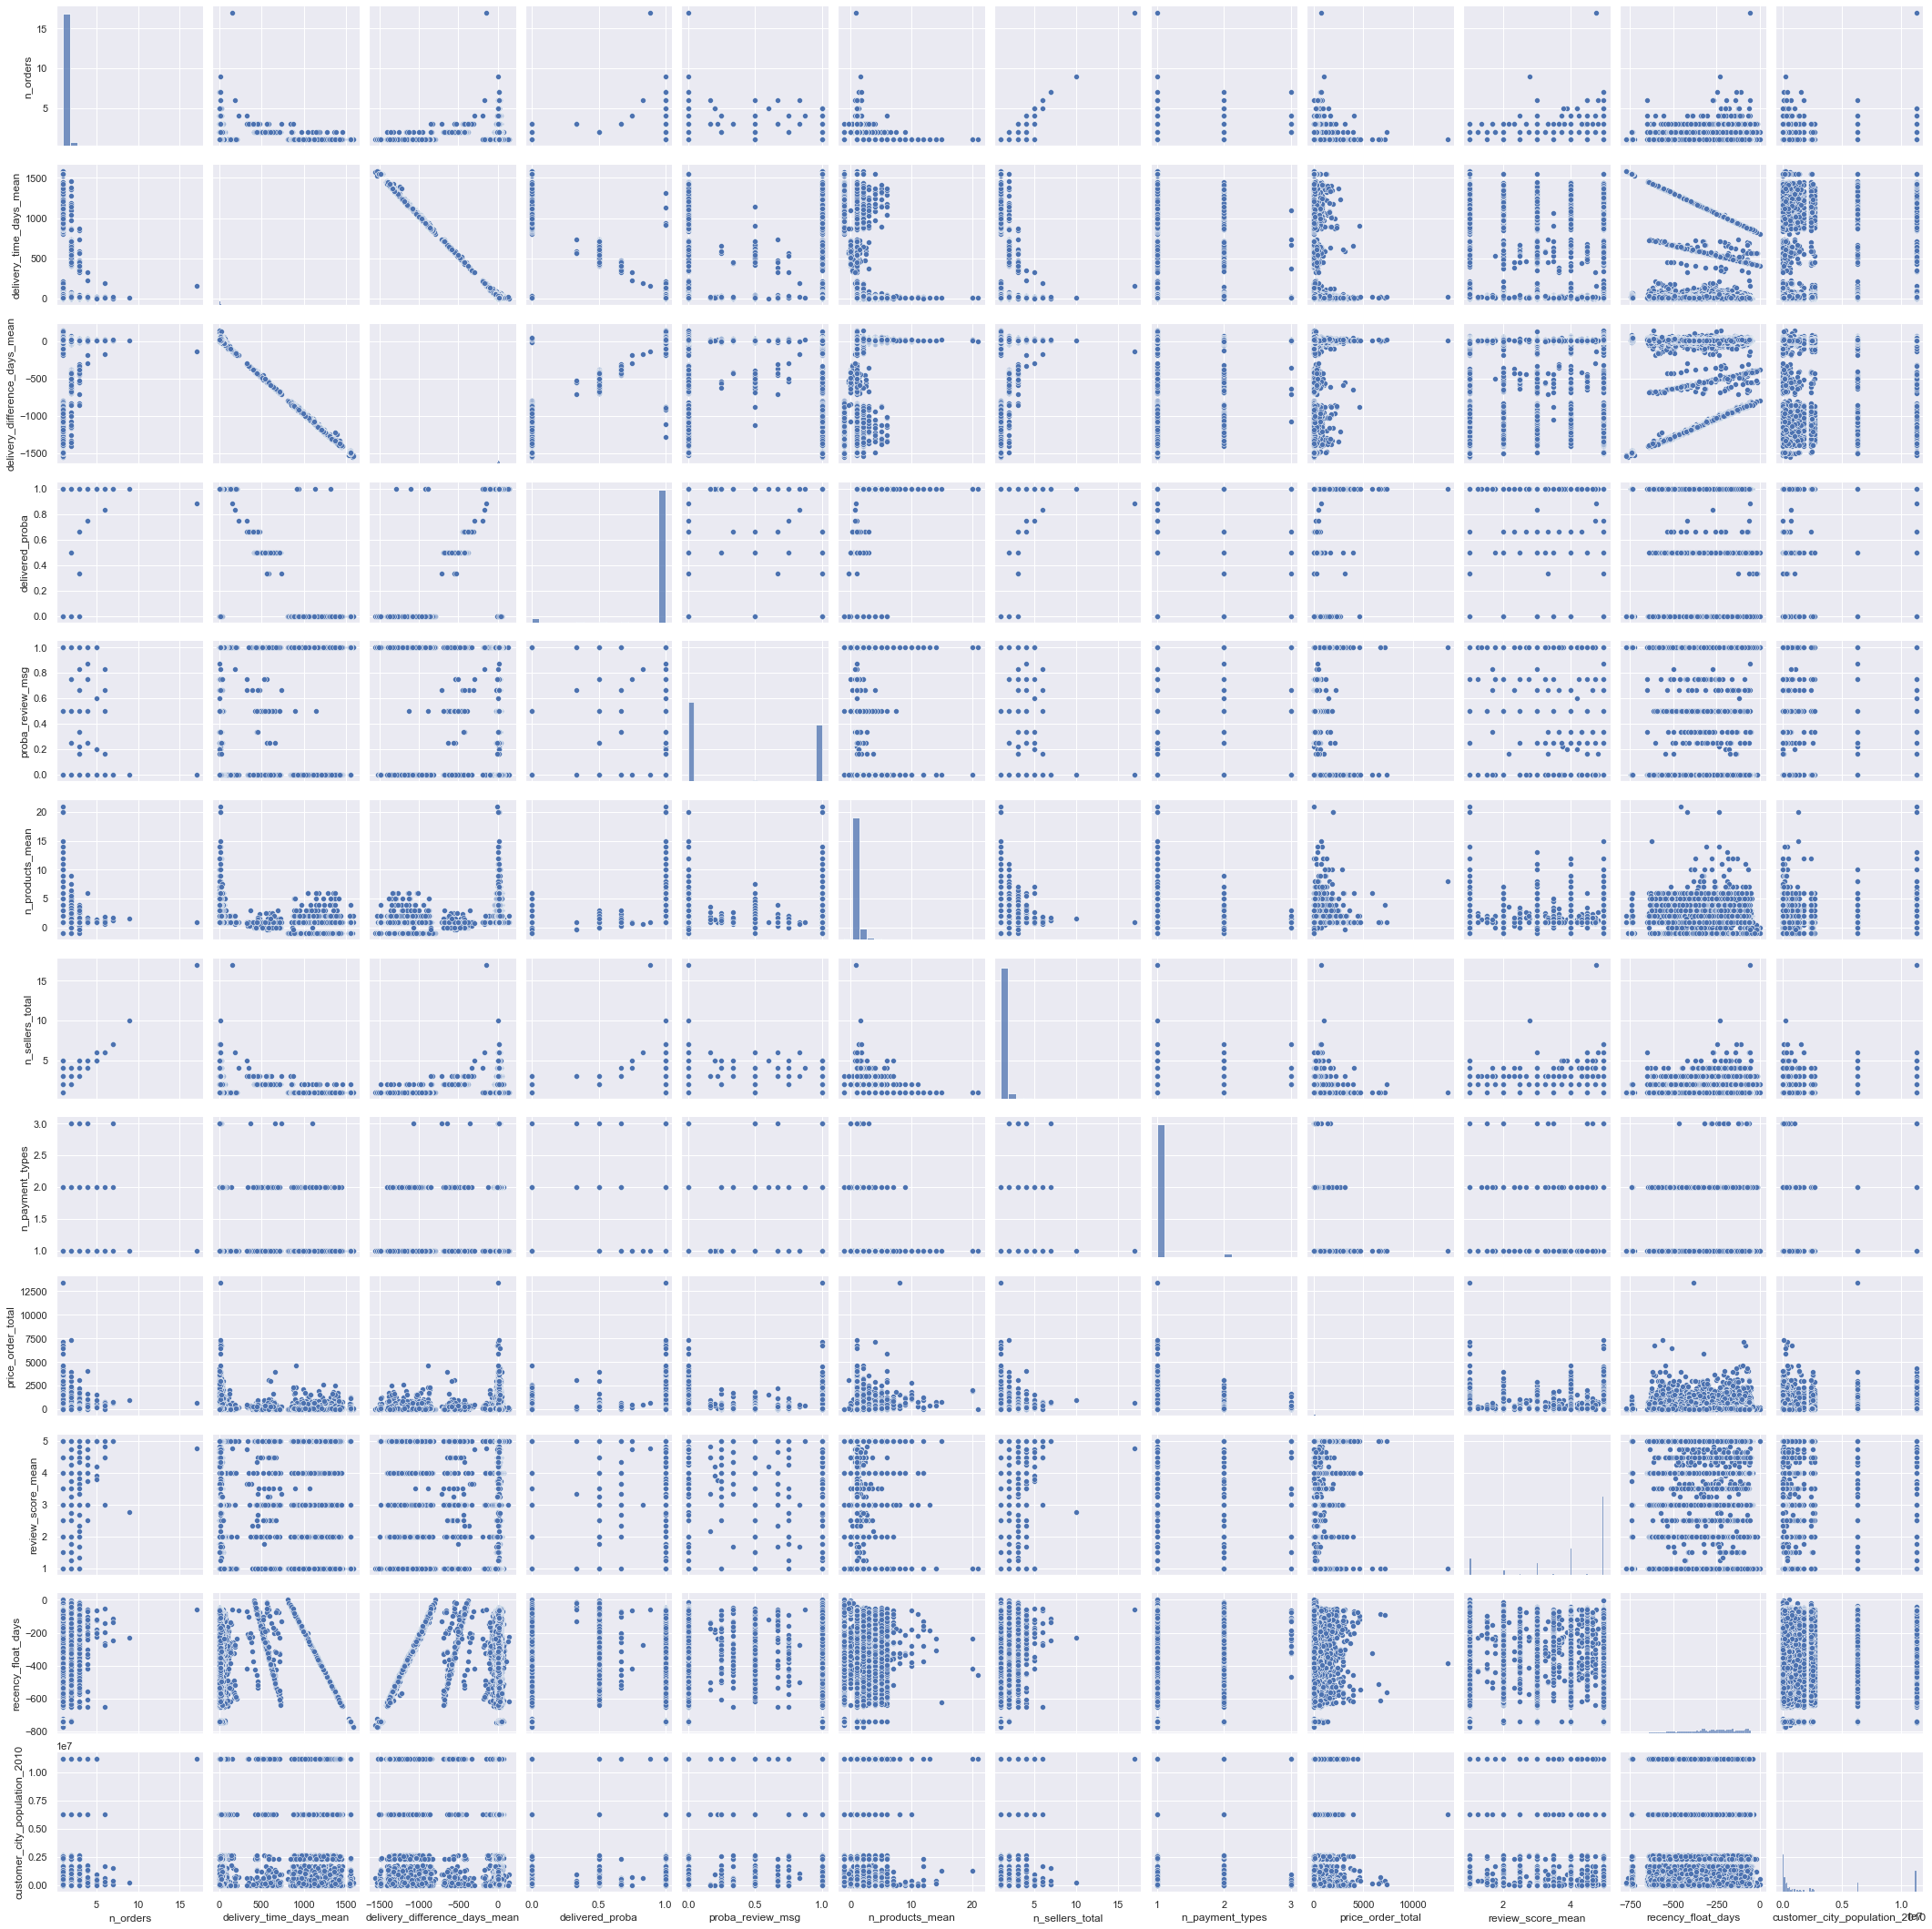

In [282]:
sns.pairplot(pairs, markers="o");

Some relationships shown by the pairplots are expected:
* the total number of orders is correlated with the total number of sellers
* customers make more orders when they are satisfied (high review score)
* the longer the delivery time, the highest is the probability not to be delivered at all (lost package for example)

Others are not so obvious at first thought:
* customers using different payment types order fewer items: maybe people having a voucher tend to order simply to use it and complete the payment value with credit card
* customers with numerous orders have shorter delivery times: this could mean that people living in remote locations tend to group their orders but people living in easily accessible areas do not hesitate to make multiple orders

In [283]:
# Calculate Spearman matrix and associated p-values
rho, p = stats.spearmanr(pairs)
cols = [
        'n_orders', 'delivery_time_days_mean', 'delivery_difference_days_mean','delivered_proba', 'proba_review_msg',
        'n_products_mean', 'n_sellers_total', 'n_payment_types', 'price_order_total', 'review_score_mean', 
        'recency_float_days', 'customer_city_population_2010'
        ]
spearman_rho = pd.DataFrame(rho, index=cols, columns=cols)
spearman_p = pd.DataFrame(p, index=cols, columns=cols)

mask_tri = np.zeros_like(spearman_rho)
mask_tri = np.zeros_like(spearman_p)
mask_tri[np.triu_indices_from(mask_tri)] = True

Text(0.5, 1.0, 'Associated p-values')

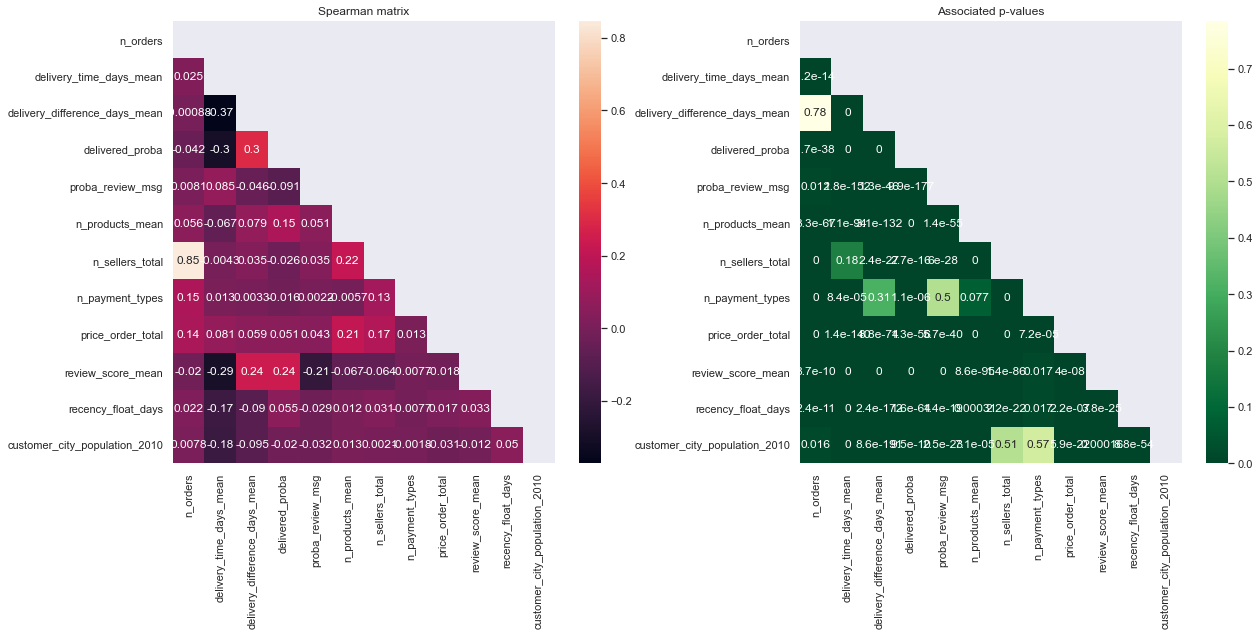

In [284]:
fig, ax = plt.subplots(1, 2, figsize=(18, 9), tight_layout=True)

sns.heatmap(ax=ax[0], data=spearman_rho, mask=mask_tri, annot=True)
sns.heatmap(ax=ax[1], data=spearman_p, mask=mask_tri, annot=True, cmap="YlGn_r")

ax[0].set_title('Spearman matrix')
ax[1].set_title('Associated p-values')

#fig.savefig("matrix.png", bbox_inches="tight", dpi=150);

The Spearman matrix and associated p-values confirm our observations on the pairplots. Note that the correlation between the delivery time and number of orders is not very strong. We also see that there is an anti-correlation between the mean review score and the proportion of written review message: this seems to indicate that unhappy customers are more likely to write a review message.

## CPA Analysis

In [285]:
customers_unique.head()

customer_unique_id                            order_id  \
0  0000366f3b9a7992bf8c76cfdf3221e2  [e22acc9c116caa3f2b7121bbb380d08e]   
1  0000b849f77a49e4a4ce2b2a4ca5be3f  [3594e05a005ac4d06a72673270ef9ec9]   
2  0000f46a3911fa3c0805444483337064  [b33ec3b699337181488304f362a6b734]   
3  0000f6ccb0745a6a4b88665a16c9f078  [41272756ecddd9a9ed0180413cc22fb6]   
4  0004aac84e0df4da2b147fca70cf8255  [d957021f1127559cd947b62533f484f7]   

   n_orders order_purchase_timestamp order_delivered_customer_date  \
0         1    [2018-05-10 10:56:27]         [2018-05-16 20:48:37]   
1         1    [2018-05-07 11:11:27]         [2018-05-10 18:02:42]   
2         1    [2017-03-10 21:05:03]         [2017-04-05 14:38:47]   
3         1    [2017-10-12 20:29:41]         [2017-11-01 21:23:05]   
4         1    [2017-11-14 19:45:42]         [2017-11-27 23:08:56]   

  order_estimated_delivery_date       delivery_time  delivery_time_days_mean  \
0         [2018-05-21 00:00:00]   [6 days 09:52:10]                    6.411   
1         [2018-05-15 00:00:00]   [3 days 06:51:15]                    3.286   
2         [2017-04-07 00:00:00]  [25 days 17:33:44]                   25.732   
3         [2017-11-13 00:00:00]  [20 days 00:53:24]                   20.037   
4         [2017-12-05 00:00:00]  [13 days 03:23:14]                   13.141   

  delivery_difference  delivery_difference_days_mean  delivered_proba  \
0   [4 days 03:11:23]                          4.133            1.000   
1   [4 days 05:57:18]                          4.248            1.000   
2   [1 days 09:21:13]                          1.390            1.000   
3  [11 days 02:36:55]                         11.109            1.000   
4   [7 days 00:51:04]                          7.035            1.000   

                           product_id  n_products_mean  n_products_total  \
0  [372645c7439f9661fbbacfd129aa92ec]            1.000             1.000   
1  [5099f7000472b634fea8304448d20825]            1.000             1.000   
2  [64b488de448a5324c4134ea39c28a34b]            1.000             1.000   
3  [2345a354a6f2033609bbf62bf5be9ef6]            1.000             1.000   
4  [c72e18b3fe2739b8d24ebf3102450f37]            1.000             1.000   

  product_category_name_english                           seller_id  \
0              [bed_bath_table]  [da8622b14eb17ae2831f4ac5b9dab84a]   
1               [health_beauty]  [138dbe45fc62f1e244378131a6801526]   
2                  [stationery]  [3d871de0142ce09b7081e2b9d1733cb1]   
3                   [telephony]  [ef506c96320abeedfb894c34db06f478]   
4                   [telephony]  [70a12e78e608ac31179aea7f8422044b]   

   n_sellers_mean  n_sellers_total             seller_city seller_state  \
0           1.000            1.000            [piracicaba]         [SP]   
1           1.000            1.000             [sao paulo]         [SP]   
2           1.000            1.000  [campo limpo paulista]         [SP]   
3           1.000            1.000             [sao paulo]         [SP]   
4           1.000            1.000               [jacarei]         [SP]   

   n_payments_mean  payment_types  price_order_mean  price_order_total  \
0            1.000  [credit_card]           129.900            129.900   
1            1.000  [credit_card]            18.900             18.900   
2            1.000  [credit_card]            69.000             69.000   
3            1.000  [credit_card]            25.990             25.990   
4            1.000  [credit_card]           180.000            180.000   

                            review_id  review_score_mean  proba_review_title  \
0  [13359f48c3c7e41a2b8afca340937eeb]              5.000               1.000   
1  [e383e10e36a765f04f752a37c1674e43]              4.000               0.000   
2  [d89cb4217c23008b141e66c3160de8a4]              3.000               0.000   
3  [6f22e4ad2cd9e0d40c5842e4787b4321]              4.000               0.000   
4  [880a77e7dd4e496969f138f974cc44a1]        

In [286]:
data_acp = customers_unique[
    ['n_orders', 'delivery_time_days_mean', 'delivery_difference_days_mean','delivered_proba', 
    'n_products_mean', 'n_products_total', 'n_sellers_mean', 'n_sellers_total', 'n_payments_mean', 
    'n_payment_types', 'price_order_mean', 'price_order_total', 'review_score_mean', 'recency_float_days',
    'proba_review_title', 'proba_review_msg', 'timelapse_review_creation_answer_mean', 'customer_city_population_2010']
    ].copy()

In [287]:
data_acp.head()

n_orders  delivery_time_days_mean  delivery_difference_days_mean  \
0         1                    6.411                          4.133   
1         1                    3.286                          4.248   
2         1                   25.732                          1.390   
3         1                   20.037                         11.109   
4         1                   13.141                          7.035   

   delivered_proba  n_products_mean  n_products_total  n_sellers_mean  \
0            1.000            1.000             1.000           1.000   
1            1.000            1.000             1.000           1.000   
2            1.000            1.000             1.000           1.000   
3            1.000            1.000             1.000           1.000   
4            1.000            1.000             1.000           1.000   

   n_sellers_total  n_payments_mean  n_payment_types  price_order_mean  \
0            1.000            1.000                1           129.900   
1            1.000            1.000                1            18.900   
2            1.000            1.000                1            69.000   
3            1.000            1.000                1            25.990   
4            1.000            1.000                1           180.000   

   price_order_total  review_score_mean  recency_float_days  \
0            129.900              5.000            -160.274   
1             18.900              4.000            -163.263   
2             69.000              3.000            -585.851   
3             25.990              4.000            -369.875   
4            180.000              5.000            -336.906   

   proba_review_title  proba_review_msg  \
0               1.000             1.000   
1               0.000             0.000   
2               0.000             0.000   
3               0.000             1.000   
4               0.000             0.000   

   timelapse_review_creation_answer_mean  customer_city_population_2010  
0                                  4.573                      64114.000  
1                                  0.937                     666740.000  
2                                  1.055                     209804.000  
3                                  1.012                    1393399.000  
4                                  4.937                     586625.000

One value in `customer_city_population_2010` still have a NaN, we delete this line.

In [288]:
data_acp.dropna(inplace=True)

In [289]:
# We will compute 8 axes
n_comp = 8
# Les variables que l'on va prendre en compte dans l'analyse :

X = data_acp.values
noms = data_acp.index
features = [
    'n_orders', 'delivery_time_days_mean', 'delivery_difference_days_mean','delivered_proba', 
    'n_products_mean', 'n_products_total', 'n_sellers_mean', 'n_sellers_total', 'n_payments_mean', 
    'n_payment_types', 'price_order_mean', 'price_order_total', 'review_score_mean', 'recency_float_days',
    'proba_review_title', 'proba_review_msg', 'timelapse_review_creation_answer_mean', 'customer_city_population_2010'
    ]

# Scaling data
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Main axes calculation
acp = PCA(n_components=n_comp)
acp.fit(X_scaled)

PCA(n_components=8)

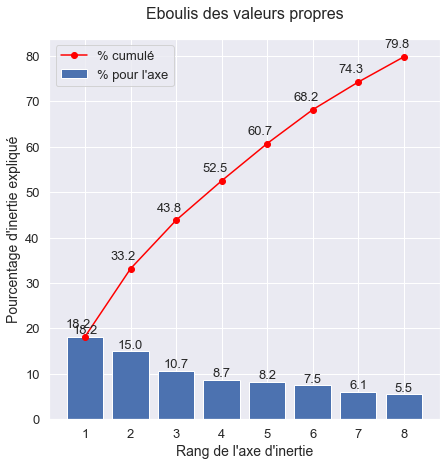

In [290]:
display_eigenvalues(acp)

In [291]:
print(f"The first main axis of PCA explains \
{round(np.cumsum(acp.explained_variance_ratio_ * 100)[0],2)} % of data variance.")
print(f"The first 4 main axis of PCA explain \
{round(np.cumsum(acp.explained_variance_ratio_ * 100)[3],2)} % of data variance.")
print(f"The first 6 main axis of PCA explain \
{round(np.cumsum(acp.explained_variance_ratio_ * 100)[5],2)} % of data variance.")

The first main axis of PCA explains 18.21 % of data variance.
The first 4 main axis of PCA explain 52.51 % of data variance.
The first 6 main axis of PCA explain 68.17 % of data variance.


There is no clear break in the curve of the percentage of explained inertia of the PCA, except maybe between the second and third axis. We will analyse the first 6 axis that reflect about 68% of the variance of all data.

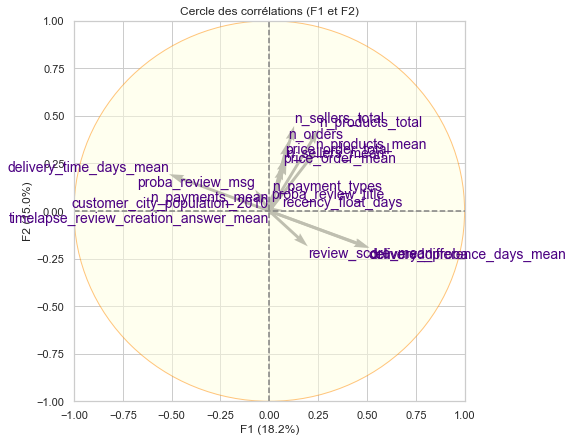

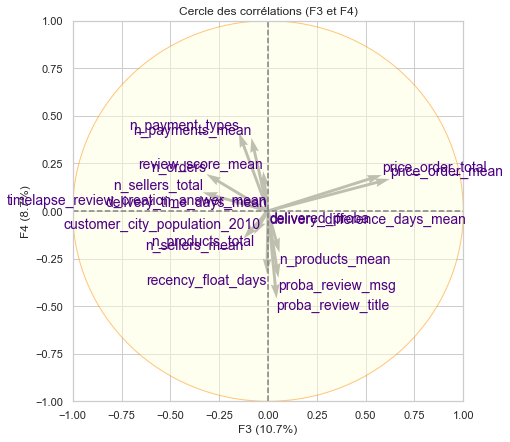

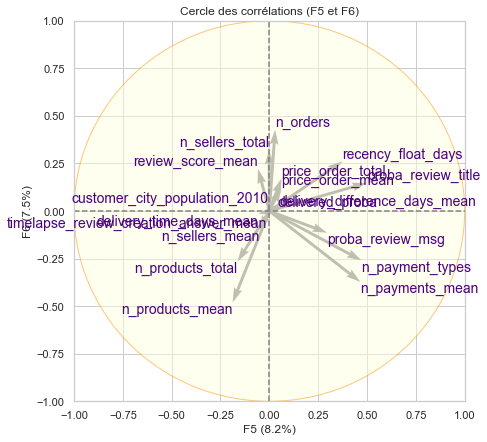

In [292]:
# Correlation circles
pcs = acp.components_

display_circles(pcs, n_comp, acp, [(0,1),(2,3),(4,5)], labels = np.array(features))

For the interpretation of the PCA, we have to keep in mind that with 17 variables, the quality of projection along PCA axis is not very good (arrows far from the border of the circle).

First and second axis:
* variable are not totatly aligned with the axis, but we can nonetheless make a few observations
* the top part of the first axis will gather customers making the largest volume of sells with numerous and/or expensive orders (bottom will be customers with few/cheap orders)
* the second axis is correlated with high review scores and early arrivals of packages with respect to expected date, therefore satisfied customers, left side represent unsatisfied customers correlated with long delivery times

Third and fourth axis:
* the third axis is correlated with customers using several payment types that are apparently the least active (low recency, top part of the circle), whereas more renct customers will be in the bottom part of the graph and leave review messages more often
* the fourth axis is correlated with customers spending a lot of money but buying only to a few sellers (right part), and anti-correlated with customers making a lot of orders (and therefore to several different sellers) for a low amount of money (left part)

Fith and sixth axis:
* this graph is less organized the interpretation is to be taken with caution
* the fith axis seems more correlated with the number of orders
* the sixth axis seems to be correlated with customers leaving more review message/title and using numerous payment types

We will plot the first 3000 customers on the CPA axis:

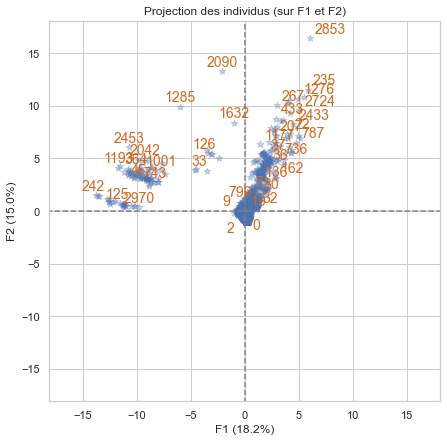

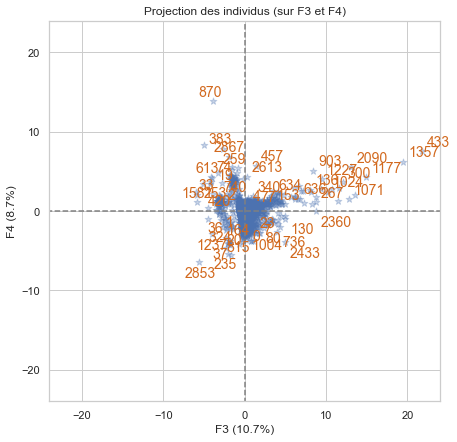

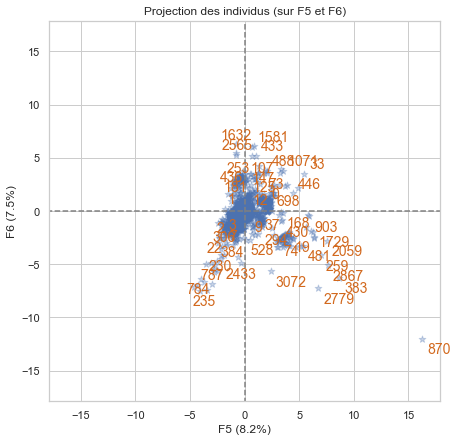

In [293]:
X_projected = acp.transform(X_scaled)
display_factorial_planes(X_projected[:3000, :], 6, acp, [(0,1),(2,3), (4,5)], labels = np.array(noms)[:3000], alpha=0.3)

## Export data for clustering

In [294]:
path_customer_unique = os.path.join(path, "customers_unique.csv")

In [295]:
customers_unique.to_csv(path_customer_unique)

Now you may go to the 'clustering' notebook. See you there.